# Capstone Project - 1
## Predicting Property Prices in a Specific Location Using Machine Learning

#### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.gridspec import GridSpec
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")

from scipy import stats
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder

import warnings
warnings.filterwarnings('ignore')

# So that we can see all the columns
pd.set_option("display.max_columns", None)

#### Importing  Dataset

In [2]:
data = pd.read_csv("D:\\Digicrome classes\\Capstone Project\\Capstone 1\\Property_data.csv")


#### Exploring Dataset

In [3]:
data.head()

PropertyID  PropertyClass PropertyZone  PropertyFrontage  PropertySize  \
0           1             60           RL              65.0          8450   
1           2             20           RL              80.0          9600   
2           3             60           RL              68.0         11250   
3           4             70           RL              60.0          9550   
4           5             60           RL              84.0         14260   

  Street Alley PropertyShape Elevation Amenities Orientation Grade  \
0   Pave   NaN           Reg       Lvl    AllPub      Inside   Gtl   
1   Pave   NaN           Reg       Lvl    AllPub         FR2   Gtl   
2   Pave   NaN           IR1       Lvl    AllPub      Inside   Gtl   
3   Pave   NaN           IR1       Lvl    AllPub      Corner   Gtl   
4   Pave   NaN           IR1       Lvl    AllPub         FR2   Gtl   

  Neighborhood Condition1 Condition2 BldgType PropertyStyle  OverallQual  \
0      CollgCr       Norm       Norm     1Fam        2Story            7   
1      Veenker      Feedr       Norm     1Fam        1Story            6   
2      CollgCr       Norm       Norm     1Fam        2Story            7   
3      Crawfor       Norm       Norm     1Fam        2Story            7   
4      NoRidge       Norm       Norm     1Fam        2Story            8   

   OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Roof1Material  \
0            5       2003          2003     Gable  CompShg       VinylSd   
1            8       1976          1976     Gable  CompShg       MetalSd   
2            5       2001          2002     Gable  CompShg       VinylSd   
3            5       1915          1970     Gable  CompShg       Wd Sdng   
4            5       2000          2000     Gable  CompShg       VinylSd   

  Roof2Material ExteriorCladdingType  ExteriorCladdingArea ExterQual  \
0       VinylSd              BrkFace                 196.0        Gd   
1       MetalSd                  NaN                   0.0        TA   
2       VinylSd              BrkFace                 162.0        Gd   
3       Wd Shng                  NaN                   0.0        TA   
4       VinylSd              BrkFace                 350.0        Gd   

  ExterCond PropertyFooting BsmntFinish BsmntMaintenance BsmntVisibility  \
0        TA           PConc          Gd               TA              No   
1        TA          CBlock          Gd               TA              Gd   
2        TA           PConc          Gd               TA              Mn   
3        TA          BrkTil          TA               Gd              No   
4        TA           PConc          Gd               TA              Av   

  BsmntFinRat1  BsmntFinSty1 BsmntFinQual1  BsmtFinSF2  BsmtUnfSF  \
0          GLQ           706           Unf           0        150   
1          ALQ           978           Unf           0        284   
2          GLQ           486           Unf           0        434   
3          ALQ           216           Unf           0        540   
4          GLQ           655           Unf           0        490   

   BsmntSqFtage Heating HeatingEfficiency CentralAir Electrical  1stFlrSF  \
0           856    GasA                Ex          Y      SBrkr       856   
1          1262    GasA                Ex          Y      SBrkr      1262   
2           920    GasA                Ex          Y      SBrkr       920   
3           756    GasA                Gd          Y      SBrkr       961   
4          1145    GasA                Ex          Y      SBrkr      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  Bath1  \
0       854             0       1710             1             0      2   
1         0             0       1262             0             1      2   
2       866             0       1786             1             0      2   
3       756             0       1717             1             0      1   
4      1053             0       2198             1            

In [4]:
data.tail()

PropertyID  PropertyClass PropertyZone  PropertyFrontage  PropertySize  \
1455        1456             60           RL              62.0          7917   
1456        1457             20           RL              85.0         13175   
1457        1458             70           RL              66.0          9042   
1458        1459             20           RL              68.0          9717   
1459        1460             20           RL              75.0          9937   

     Street Alley PropertyShape Elevation Amenities Orientation Grade  \
1455   Pave   NaN           Reg       Lvl    AllPub      Inside   Gtl   
1456   Pave   NaN           Reg       Lvl    AllPub      Inside   Gtl   
1457   Pave   NaN           Reg       Lvl    AllPub      Inside   Gtl   
1458   Pave   NaN           Reg       Lvl    AllPub      Inside   Gtl   
1459   Pave   NaN           Reg       Lvl    AllPub      Inside   Gtl   

     Neighborhood Condition1 Condition2 BldgType PropertyStyle  OverallQual  \
1455      Gilbert       Norm       Norm     1Fam        2Story            6   
1456       NWAmes       Norm       Norm     1Fam        1Story            6   
1457      Crawfor       Norm       Norm     1Fam        2Story            7   
1458        NAmes       Norm       Norm     1Fam        1Story            5   
1459      Edwards       Norm       Norm     1Fam        1Story            5   

      OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Roof1Material  \
1455            5       1999          2000     Gable  CompShg       VinylSd   
1456            6       1978          1988     Gable  CompShg       Plywood   
1457            9       1941          2006     Gable  CompShg       CemntBd   
1458            6       1950          1996       Hip  CompShg       MetalSd   
1459            6       1965          1965     Gable  CompShg       HdBoard   

     Roof2Material ExteriorCladdingType  ExteriorCladdingArea ExterQual  \
1455       VinylSd                  NaN                   0.0        TA   
1456       Plywood                Stone                 119.0        TA   
1457       CmentBd                  NaN                   0.0        Ex   
1458       MetalSd                  NaN                   0.0        TA   
1459       HdBoard                  NaN                   0.0        Gd   

     ExterCond PropertyFooting BsmntFinish BsmntMaintenance BsmntVisibility  \
1455        TA           PConc          Gd               TA              No   
1456        TA          CBlock          Gd               TA              No   
1457        Gd           Stone          TA               Gd              No   
1458        TA          CBlock          TA               TA              Mn   
1459        TA          CBlock          TA               TA              No   

     BsmntFinRat1  BsmntFinSty1 BsmntFinQual1  BsmtFinSF2  BsmtUnfSF  \
1455          Unf             0           Unf           0        953   
1456          ALQ           790           Rec         163        589   
1457          GLQ           275           Unf           0        877   
1458          GLQ            49           Rec        1029          0   
1459          BLQ           830           LwQ         290        136   

      BsmntSqFtage Heating HeatingEfficiency CentralAir Electrical  1stFlrSF  \
1455           953    GasA                Ex          Y      SBrkr       953   
1456          1542    GasA                TA          Y      SBrkr      2073   
1457          1152    GasA                Ex          Y      SBrkr      1188   
1458          1078    GasA                Gd          Y      FuseA      1078   
1459          1256    GasA                Gd          Y      SBrkr      1256   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  Bath1  \
1455       694             0       1647             0             0      2   
1456         0             0       2073             1             0      2   
1457      1152             0       2340             0         

In [5]:
data.shape

(1460, 81)

In [6]:
data.columns

Index(['PropertyID', 'PropertyClass', 'PropertyZone', 'PropertyFrontage',
       'PropertySize', 'Street', 'Alley', 'PropertyShape', 'Elevation',
       'Amenities', 'Orientation', 'Grade', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'PropertyStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Roof1Material',
       'Roof2Material', 'ExteriorCladdingType', 'ExteriorCladdingArea',
       'ExterQual', 'ExterCond', 'PropertyFooting', 'BsmntFinish',
       'BsmntMaintenance', 'BsmntVisibility', 'BsmntFinRat1', 'BsmntFinSty1',
       'BsmntFinQual1', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmntSqFtage', 'Heating',
       'HeatingEfficiency', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'Bath1',
       'Bath2', 'BedroomUpLev', 'KitchenUpLev', 'KitchenQual', 'CntRmsUpLev',
       'Functional', 'CntFireplaces', 'QualFireplace', 'BasementType',
       'BasementYrBlt

In [7]:
data.describe().T

count           mean           std      min        25%  \
PropertyID            1460.0     730.500000    421.610009      1.0     365.75   
PropertyClass         1460.0      56.897260     42.300571     20.0      20.00   
PropertyFrontage      1201.0      70.049958     24.284752     21.0      59.00   
PropertySize          1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual           1460.0       6.099315      1.382997      1.0       5.00   
OverallCond           1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt             1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd          1460.0    1984.865753     20.645407   1950.0    1967.00   
ExteriorCladdingArea  1452.0     103.685262    181.066207      0.0       0.00   
BsmntFinSty1          1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2            1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF             1460.0     567.240411    441.866955      0.0     223.00   
BsmntSqFtage          1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF              1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF              1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF          1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea             1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath          1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath          1460.0       0.057534      0.238753      0.0       0.00   
Bath1                 1460.0       1.565068      0.550916      0.0       1.00   
Bath2                 1460.0       0.382877      0.502885      0.0       0.00   
BedroomUpLev          1460.0       2.866438      0.815778      0.0       2.00   
KitchenUpLev          1460.0       1.046575      0.220338      0.0       1.00   
CntRmsUpLev           1460.0       6.517808      1.625393      2.0       5.00   
CntFireplaces         1460.0       0.613014      0.644666      0.0       0.00   
BasementYrBlt         1379.0    1978.506164     24.689725   1900.0    1961.00   
BasementCars          1460.0       1.767123      0.747315      0.0       1.00   
BasementSqFootage     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF            1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF           1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch         1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch             1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch           1460.0      15.060959     55.757415      0.0       0.00   
PoolArea              1460.0       2.758904     40.177307      0.0       0.00   
AddVal                1460.0      43.489041    496.123024      0.0       0.00   
SaleMon               1460.0       6.321918      2.703626      1.0       5.00   
SaleYr                1460.0    2007.815753      1.328095   2006.0    2007.00   
PropPrice             1460.0  180921.195890  79442.502883  34900.0  129975.00   

                           50%        75%       max  
PropertyID               730.5    1095.25    1460.0  
PropertyClass             50.0      70.00     190.0  
PropertyFrontage          69.0      80.00     313.0  
PropertySize            9478.5   11601.50  215245.0  
OverallQual                6.0       7.00      10.0  
OverallCond                5.0       6.00       9.0  
YearBuilt               1973.0    2000.00    2010.0  
YearRemodAdd            1994.0    2004.00    2010.0  
ExteriorCladdingArea       0.0     166.00    1600.0  
BsmntFinSty1             383.5     712.25    5644.0  
BsmtFinSF2                 0.0       0.00    1474.0  
BsmtUnfSF                477.5     808.00    2336.0  
BsmntSqFtage             991.5    1298.25    6110.0  
1stFlrSF                1087.0    1391.25    4692.0  
2ndFlrSF                   0.0     728.00    2065.0  

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PropertyID            1460 non-null   int64  
 1   PropertyClass         1460 non-null   int64  
 2   PropertyZone          1460 non-null   object 
 3   PropertyFrontage      1201 non-null   float64
 4   PropertySize          1460 non-null   int64  
 5   Street                1460 non-null   object 
 6   Alley                 91 non-null     object 
 7   PropertyShape         1460 non-null   object 
 8   Elevation             1460 non-null   object 
 9   Amenities             1460 non-null   object 
 10  Orientation           1460 non-null   object 
 11  Grade                 1460 non-null   object 
 12  Neighborhood          1460 non-null   object 
 13  Condition1            1460 non-null   object 
 14  Condition2            1460 non-null   object 
 15  BldgType             

### Performing Descriptive Statistical Analysis on Categorical Features

In [9]:
data.describe(include='object')

PropertyZone Street Alley PropertyShape Elevation Amenities  \
count          1460   1460    91          1460      1460      1460   
unique            5      2     2             4         4         2   
top              RL   Pave  Grvl           Reg       Lvl    AllPub   
freq           1151   1454    50           925      1311      1459   

       Orientation Grade Neighborhood Condition1 Condition2 BldgType  \
count         1460  1460         1460       1460       1460     1460   
unique           5     3           25          9          8        5   
top         Inside   Gtl        NAmes       Norm       Norm     1Fam   
freq          1052  1382          225       1260       1445     1220   

       PropertyStyle RoofStyle RoofMatl Roof1Material Roof2Material  \
count           1460      1460     1460          1460          1460   
unique             8         6        8            15            16   
top           1Story     Gable  CompShg       VinylSd       VinylSd   
freq             726      1141     1434           515           504   

       ExteriorCladdingType ExterQual ExterCond PropertyFooting BsmntFinish  \
count                   588      1460      1460            1460        1423   
unique                    3         4         5               6           4   
top                 BrkFace        TA        TA           PConc          TA   
freq                    445       906      1282             647         649   

       BsmntMaintenance BsmntVisibility BsmntFinRat1 BsmntFinQual1 Heating  \
count              1423            1422         1423          1422    1460   
unique                4               4            6             6       6   
top                  TA              No          Unf           Unf    GasA   
freq               1311             953          430          1256    1428   

       HeatingEfficiency CentralAir Electrical KitchenQual Functional  \
count               1460       1460       1459        1460       1460   
unique                 5          2          5           4          7   
top                   Ex          Y      SBrkr          TA        Typ   
freq                 741       1365       1334         735       1360   

       QualFireplace BasementType BasementFinish BasementQual BasementCond  \
count            770         1379           1379         1379         1379   
unique             5            6              3            5            5   
top               Gd       Attchd            Unf           TA           TA   
freq             380          870            605         1311         1326   

       PavedDrive PoolQC BoundaryFeatures AddFeatures SaleType SaleCondn  
count        1460      7              281          54     1460      1460  
unique          3      3                4           4        9         6  
top             Y     Gd            MnPrv        Shed       WD    Normal  
freq         1340      3              157          49     1267      1198

### Inference:
##### None of the categorical variables are having high cardinality.
##### Features like Neighborhood, Exterior1st, Exterior2nd are having little bit of high cardinality but that can be manged using different techniques of encoding

###  Performing Descriptive Statistical Analysis on Numerical Features.

In [10]:
data.describe(include=[int,float])

PropertyID  PropertyClass  PropertyFrontage   PropertySize  \
count  1460.000000    1460.000000       1201.000000    1460.000000   
mean    730.500000      56.897260         70.049958   10516.828082   
std     421.610009      42.300571         24.284752    9981.264932   
min       1.000000      20.000000         21.000000    1300.000000   
25%     365.750000      20.000000         59.000000    7553.500000   
50%     730.500000      50.000000         69.000000    9478.500000   
75%    1095.250000      70.000000         80.000000   11601.500000   
max    1460.000000     190.000000        313.000000  215245.000000   

       OverallQual  OverallCond    YearBuilt  YearRemodAdd  \
count  1460.000000  1460.000000  1460.000000   1460.000000   
mean      6.099315     5.575342  1971.267808   1984.865753   
std       1.382997     1.112799    30.202904     20.645407   
min       1.000000     1.000000  1872.000000   1950.000000   
25%       5.000000     5.000000  1954.000000   1967.000000   
50%       6.000000     5.000000  1973.000000   1994.000000   
75%       7.000000     6.000000  2000.000000   2004.000000   
max      10.000000     9.000000  2010.000000   2010.000000   

       ExteriorCladdingArea  BsmntFinSty1   BsmtFinSF2    BsmtUnfSF  \
count           1452.000000   1460.000000  1460.000000  1460.000000   
mean             103.685262    443.639726    46.549315   567.240411   
std              181.066207    456.098091   161.319273   441.866955   
min                0.000000      0.000000     0.000000     0.000000   
25%                0.000000      0.000000     0.000000   223.000000   
50%                0.000000    383.500000     0.000000   477.500000   
75%              166.000000    712.250000     0.000000   808.000000   
max             1600.000000   5644.000000  1474.000000  2336.000000   

       BsmntSqFtage     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  \
count   1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean    1057.429452  1162.626712   346.992466      5.844521  1515.463699   
std      438.705324   386.587738   436.528436     48.623081   525.480383   
min        0.000000   334.000000     0.000000      0.000000   334.000000   
25%      795.750000   882.000000     0.000000      0.000000  1129.500000   
50%      991.500000  1087.000000     0.000000      0.000000  1464.000000   
75%     1298.250000  1391.250000   728.000000      0.000000  1776.750000   
max     6110.000000  4692.000000  2065.000000    572.000000  5642.000000   

       BsmtFullBath  BsmtHalfBath        Bath1        Bath2  BedroomUpLev  \
count   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   
mean       0.425342      0.057534     1.565068     0.382877      2.866438   
std        0.518911      0.238753     0.550916     0.502885      0.815778   
min        0.000000      0.000000     0.000000     0.000000      0.000000   
25%        0.000000      0.000000     1.000000     0.000000      2.000000   
50%        0.000000      0.000000     2.000000     0.000000      3.000000   
75%        1.000000      0.000000     2.000000     1.000000      3.000000   
max        3.000000      2.000000     3.000000     2.000000      8.000000   

       KitchenUpLev  CntRmsUpLev  CntFireplaces  BasementYrBlt  BasementCars  \
count   1460.000000  1460.000000    1460.000000    1379.000000   1460.000000   
mean       1.046575     6.517808       0.613014    1978.506164      1.767123   
std        0.220338     1.625393       0.644666      24.689725      0.747315   
min        0.000000     2.000000       0.000000    1900.000000      0.000000   
25%        1.000000     5.000000       0.000000    1961.000000      1.000000   
50%        1.000000     6.000000       1.000000    1980.000000      2.000000   
75%        1.000000     7.000000       1.000000    2002.000000      2.000000   
max        3.000000    14.000000       3.000000    2010.000000      4.000000   

       BasementSqFootage   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count    

### Performing Descriptive Statistical Analysis on Numerical Features.

In [11]:
data.describe(include=[int,float])

PropertyID  PropertyClass  PropertyFrontage   PropertySize  \
count  1460.000000    1460.000000       1201.000000    1460.000000   
mean    730.500000      56.897260         70.049958   10516.828082   
std     421.610009      42.300571         24.284752    9981.264932   
min       1.000000      20.000000         21.000000    1300.000000   
25%     365.750000      20.000000         59.000000    7553.500000   
50%     730.500000      50.000000         69.000000    9478.500000   
75%    1095.250000      70.000000         80.000000   11601.500000   
max    1460.000000     190.000000        313.000000  215245.000000   

       OverallQual  OverallCond    YearBuilt  YearRemodAdd  \
count  1460.000000  1460.000000  1460.000000   1460.000000   
mean      6.099315     5.575342  1971.267808   1984.865753   
std       1.382997     1.112799    30.202904     20.645407   
min       1.000000     1.000000  1872.000000   1950.000000   
25%       5.000000     5.000000  1954.000000   1967.000000   
50%       6.000000     5.000000  1973.000000   1994.000000   
75%       7.000000     6.000000  2000.000000   2004.000000   
max      10.000000     9.000000  2010.000000   2010.000000   

       ExteriorCladdingArea  BsmntFinSty1   BsmtFinSF2    BsmtUnfSF  \
count           1452.000000   1460.000000  1460.000000  1460.000000   
mean             103.685262    443.639726    46.549315   567.240411   
std              181.066207    456.098091   161.319273   441.866955   
min                0.000000      0.000000     0.000000     0.000000   
25%                0.000000      0.000000     0.000000   223.000000   
50%                0.000000    383.500000     0.000000   477.500000   
75%              166.000000    712.250000     0.000000   808.000000   
max             1600.000000   5644.000000  1474.000000  2336.000000   

       BsmntSqFtage     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  \
count   1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean    1057.429452  1162.626712   346.992466      5.844521  1515.463699   
std      438.705324   386.587738   436.528436     48.623081   525.480383   
min        0.000000   334.000000     0.000000      0.000000   334.000000   
25%      795.750000   882.000000     0.000000      0.000000  1129.500000   
50%      991.500000  1087.000000     0.000000      0.000000  1464.000000   
75%     1298.250000  1391.250000   728.000000      0.000000  1776.750000   
max     6110.000000  4692.000000  2065.000000    572.000000  5642.000000   

       BsmtFullBath  BsmtHalfBath        Bath1        Bath2  BedroomUpLev  \
count   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   
mean       0.425342      0.057534     1.565068     0.382877      2.866438   
std        0.518911      0.238753     0.550916     0.502885      0.815778   
min        0.000000      0.000000     0.000000     0.000000      0.000000   
25%        0.000000      0.000000     1.000000     0.000000      2.000000   
50%        0.000000      0.000000     2.000000     0.000000      3.000000   
75%        1.000000      0.000000     2.000000     1.000000      3.000000   
max        3.000000      2.000000     3.000000     2.000000      8.000000   

       KitchenUpLev  CntRmsUpLev  CntFireplaces  BasementYrBlt  BasementCars  \
count   1460.000000  1460.000000    1460.000000    1379.000000   1460.000000   
mean       1.046575     6.517808       0.613014    1978.506164      1.767123   
std        0.220338     1.625393       0.644666      24.689725      0.747315   
min        0.000000     2.000000       0.000000    1900.000000      0.000000   
25%        1.000000     5.000000       0.000000    1961.000000      1.000000   
50%        1.000000     6.000000       1.000000    1980.000000      2.000000   
75%        1.000000     7.000000       1.000000    2002.000000      2.000000   
max        3.000000    14.000000       3.000000    2010.000000      4.000000   

       BasementSqFootage   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count    

### Inference:
##### Numerical Features like LotArea, BsmtFinSF1,BsmtUnfSF, TotalBsmtSF,GrLivArea, MiscVal and even the target feature SalePrice is having very high deviation values which can lead to bias, Overfitting, and can affect the accuracy of the model.
##### So we have to use different transformation technique to reduce the deviation between the data-points.

### Starting with first part of Data Preprocessing 

In [12]:
data.sample(5)

PropertyID  PropertyClass PropertyZone  PropertyFrontage  PropertySize  \
210         211             30           RL              67.0          5604   
283         284             20           RL              74.0          9612   
769         770             60           RL              47.0         53504   
818         819             80           RL              80.0          8816   
964         965             60           RL              80.0         11316   

    Street Alley PropertyShape Elevation Amenities Orientation Grade  \
210   Pave   NaN           Reg       Lvl    AllPub      Inside   Gtl   
283   Pave   NaN           Reg       Lvl    AllPub      Inside   Gtl   
769   Pave   NaN           IR2       HLS    AllPub     CulDSac   Mod   
818   Pave   NaN           Reg       Lvl    AllPub      Inside   Gtl   
964   Pave   NaN           Reg       Lvl    AllPub      Corner   Gtl   

    Neighborhood Condition1 Condition2 BldgType PropertyStyle  OverallQual  \
210      Edwards       Norm       Norm     1Fam        1Story            5   
283      Somerst      Feedr       Norm     1Fam        1Story            8   
769      StoneBr       Norm       Norm     1Fam        2Story            8   
818      ClearCr       Norm       Norm     1Fam          SLvl            6   
964       Timber       Norm       Norm     1Fam        2Story            7   

     OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Roof1Material  \
210            6       1925          1950     Gable  CompShg        Stucco   
283            5       2008          2009     Gable  CompShg       VinylSd   
769            5       2003          2003       Hip  CompShg       CemntBd   
818            7       1971          1971     Gable  CompShg       HdBoard   
964            5       2002          2003     Gable  CompShg       VinylSd   

    Roof2Material ExteriorCladdingType  ExteriorCladdingArea ExterQual  \
210        Stucco                  NaN                   0.0        TA   
283       VinylSd                Stone                  72.0        Gd   
769       Wd Shng              BrkFace                 603.0        Ex   
818       HdBoard              BrkFace                  80.0        TA   
964       VinylSd              BrkFace                  44.0        Gd   

    ExterCond PropertyFooting BsmntFinish BsmntMaintenance BsmntVisibility  \
210        TA          CBlock          TA               TA              No   
283        TA           PConc          Gd               TA              No   
769        TA           PConc          Gd               TA              Gd   
818        TA          CBlock          TA               TA              Av   
964        TA           PConc          Gd               TA              No   

    BsmntFinRat1  BsmntFinSty1 BsmntFinQual1  BsmtFinSF2  BsmtUnfSF  \
210          Rec           468           Unf           0        396   
283          Unf             0           Unf           0       1468   
769          ALQ          1416           Unf           0        234   
818          GLQ           504           Unf           0        506   
964          GLQ           624           Unf           0        193   

     BsmntSqFtage Heating HeatingEfficiency CentralAir Electrical  1stFlrSF  \
210           864    GasA                TA          N      FuseA       864   
283          1468    GasA                Ex          Y      SBrkr      1468   
769          1650    GasA                Ex          Y      SBrkr      1690   
818          1010    GasA                Gd          Y      SBrkr      1052   
964           817    GasA                Ex          Y      SBrkr       824   

     2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  Bath1  \
210         0             0        864             1             0      1   
283         0             0       1468             0             0      2   
769      1589             0       3279             1             0      3   
818         0             0       1

### Inference :
##### We can observe that feature named Id represnt a index number to each records in the dataset.
##### This feature doesn't seem relevant for the analysis, so we can simply drop this feature.

In [13]:
# Dropping the "ID" Feature

data.drop(columns="PropertyID", inplace=True)

### Computing Features with Missing Values More than 45%

In [14]:
null_data= round(data.isnull().sum()/len(data)*100,2).sort_values().to_frame().rename(columns={0:"% of Missing Values"}) 

In [15]:
null_data[(null_data["% of Missing Values"]>45)]

% of Missing Values
QualFireplace                       47.26
ExteriorCladdingType                59.73
BoundaryFeatures                    80.75
Alley                               93.77
AddFeatures                         96.30
PoolQC                              99.52

### Inference:
##### Features like PoolQC, AddFeature, Alley, BoundaryFeatures, ExteriorCladdingType and QualFireplace are having large number of missing values.
##### Data Imputation in features with large scale of misisng values can lead to bias & noise in the dataset.
##### So we can simply drop those features with large scale of missing values.

### Dropping Features with more than 45% of Missing Values.¶

In [16]:
cols=["QualFireplace","ExteriorCladdingType","BoundaryFeatures","Alley","AddFeatures","PoolQC"]
data.drop(columns=cols, inplace=True)

### Computing Total Missing Values and % of Missing Values 

In [17]:
null_data = data.isnull().sum()[data.isnull().sum()>0].sort_values().to_frame().rename(columns={0:"Total Misisng Values"})
null_data["% of Missing Values"] = round(data.isnull().sum()/len(data)*100,2).sort_values().to_frame()
null_data["Feature Data Type"] = data[null_data.index.tolist()].dtypes

In [18]:
null_data

Total Misisng Values  % of Missing Values  \
Electrical                               1                 0.07   
ExteriorCladdingArea                     8                 0.55   
BsmntMaintenance                        37                 2.53   
BsmntFinish                             37                 2.53   
BsmntFinRat1                            37                 2.53   
BsmntVisibility                         38                 2.60   
BsmntFinQual1                           38                 2.60   
BasementType                            81                 5.55   
BasementCond                            81                 5.55   
BasementYrBlt                           81                 5.55   
BasementFinish                          81                 5.55   
BasementQual                            81                 5.55   
PropertyFrontage                       259                17.74   

                     Feature Data Type  
Electrical                      object  
ExteriorCladdingArea           float64  
BsmntMaintenance                object  
BsmntFinish                     object  
BsmntFinRat1                    object  
BsmntVisibility                 object  
BsmntFinQual1                   object  
BasementType                    object  
BasementCond                    object  
BasementYrBlt                  float64  
BasementFinish                  object  
BasementQual                    object  
PropertyFrontage               float64

### Inference:
##### Total 13 columns are still having missing values.
##### We will fill missing values separately in categorical and Numerical Columns.

### Filling Missing Values in Features realted to Basement

In [19]:
for col in ["BsmntMaintenance","BsmntFinish","BsmntFinRat1","BsmntVisibility","BsmntFinQual1","BasementType","BasementCond","BasementYrBlt","BasementFinish","BasementQual"]:
        data[col]=data[col].fillna("None")

### Filling Missing Values in Categorical Columns

In [20]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")
data[["Electrical"]]= imputer.fit_transform(data[["Electrical"]])

### Filling the missing Values in Numerical columns

In [21]:
data["PropertyFrontage"]= data.groupby("Neighborhood")["PropertyFrontage"].transform(lambda x:x.fillna(x.median()))
data["ExteriorCladdingArea"]= data["ExteriorCladdingArea"].fillna(0.0)

### Confirming Filling Missing Values

In [22]:
print("Total Missing Values left is:", data.isnull().sum().sum())

Total Missing Values left is: 0


## Starting with Exploratory Data Analysis

#### Analyzing & VIsualizing Target Variable

In [23]:
data["PropPrice"].describe().to_frame().T

count          mean           std      min       25%       50%  \
PropPrice  1460.0  180921.19589  79442.502883  34900.0  129975.0  163000.0   

                75%       max  
PropPrice  214000.0  755000.0

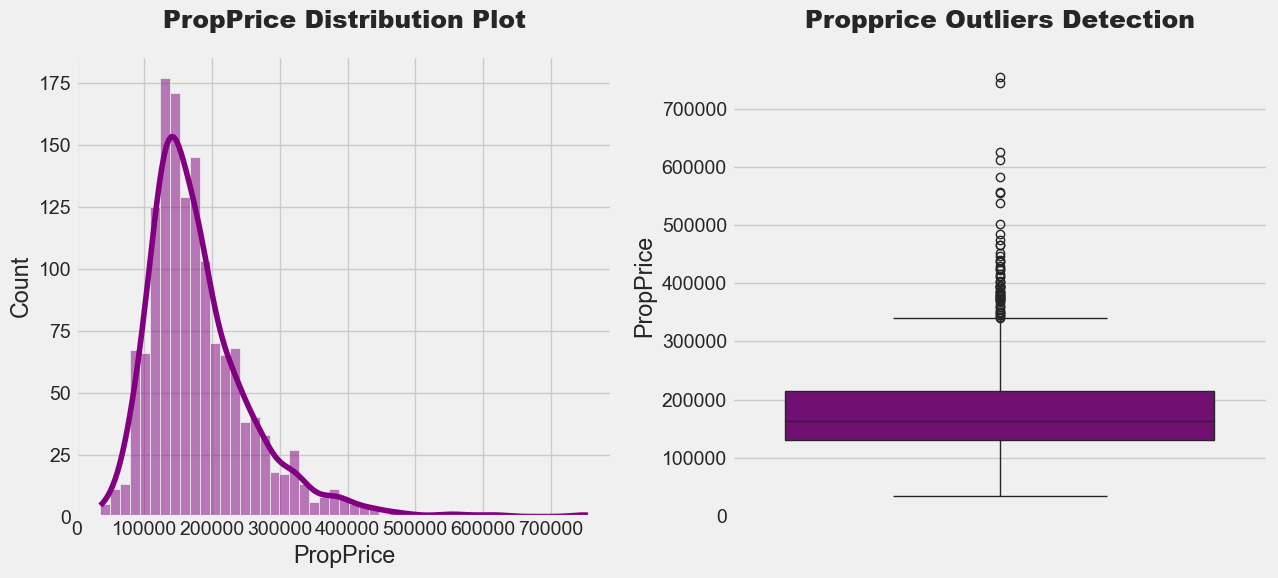

In [24]:
plt.figure(figsize=(13,6))

plt.subplot(1,2,1)
sns.histplot(data["PropPrice"],color="purple",kde=True)
plt.title("PropPrice Distribution Plot", fontweight="black", pad=20, size=18)

plt.subplot(1,2,2)
sns.boxplot(data["PropPrice"],color="purple")
plt.title("Propprice Outliers Detection", fontweight="black", pad=20, size=18)
plt.tight_layout()
plt.show()


### Inference:
##### The target feature is having a right-skewed distribution due to presence of positive outliers.
##### It is apparent that SalePrice doesn't follow normal distribution, so before performing regression it has to be transformed.
##### To achieve a Normal Distribution we can use different transformation techniques like:
#####    Johnsonsu Transformation, Norm Transformation or Log Noraml Transformation
#####    From these three tansformation which ever gives best fit we can use that transformation.

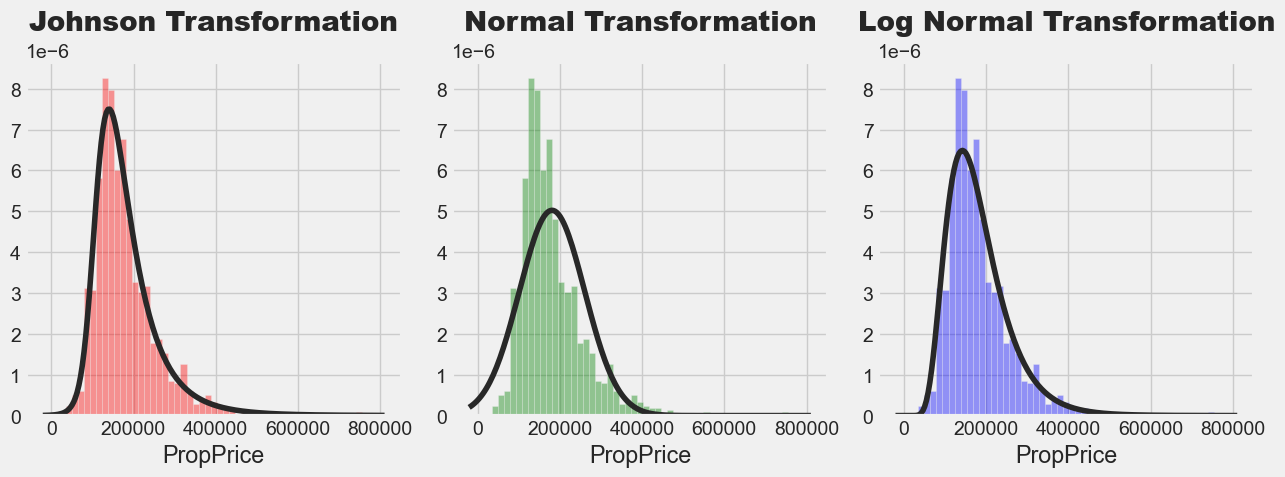

In [25]:
plt.figure(figsize=(13,5))

plt.subplot(1,3,1)
sns.distplot(data["PropPrice"],kde=False, fit=stats.johnsonsu, color="red")
plt.title("Johnson Transformation", fontweight="black", size=20, pad=10)

plt.subplot(1,3,2)
sns.distplot(data["PropPrice"],kde=False, fit=stats.norm, color="green")
plt.title("Normal Transformation", fontweight="black", size=20, pad=10)

plt.subplot(1,3,3)
sns.distplot(data["PropPrice"],kde=False, fit=stats.lognorm, color="blue")
plt.title("Log Normal Transformation", fontweight="black", size=20, pad=10)
plt.tight_layout()
plt.show()

### Inference:
##### After applying different transformation techniques the best result were given by Unbounded Johnson Transformation.
##### But the Log Normal Transformation has also done a good job to achieve a normal distribution

### Visualizing Distribution of Continous Numerical Features

In [26]:
con_cols = ["PropertyFrontage","PropertySize","ExteriorCladdingArea","BsmntFinSty1","BsmtFinSF2","BsmtUnfSF","BsmntSqFtage",
            "1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","WoodDeckSF","OpenPorchSF",
            "EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","AddVal","BasementSqFootage"]

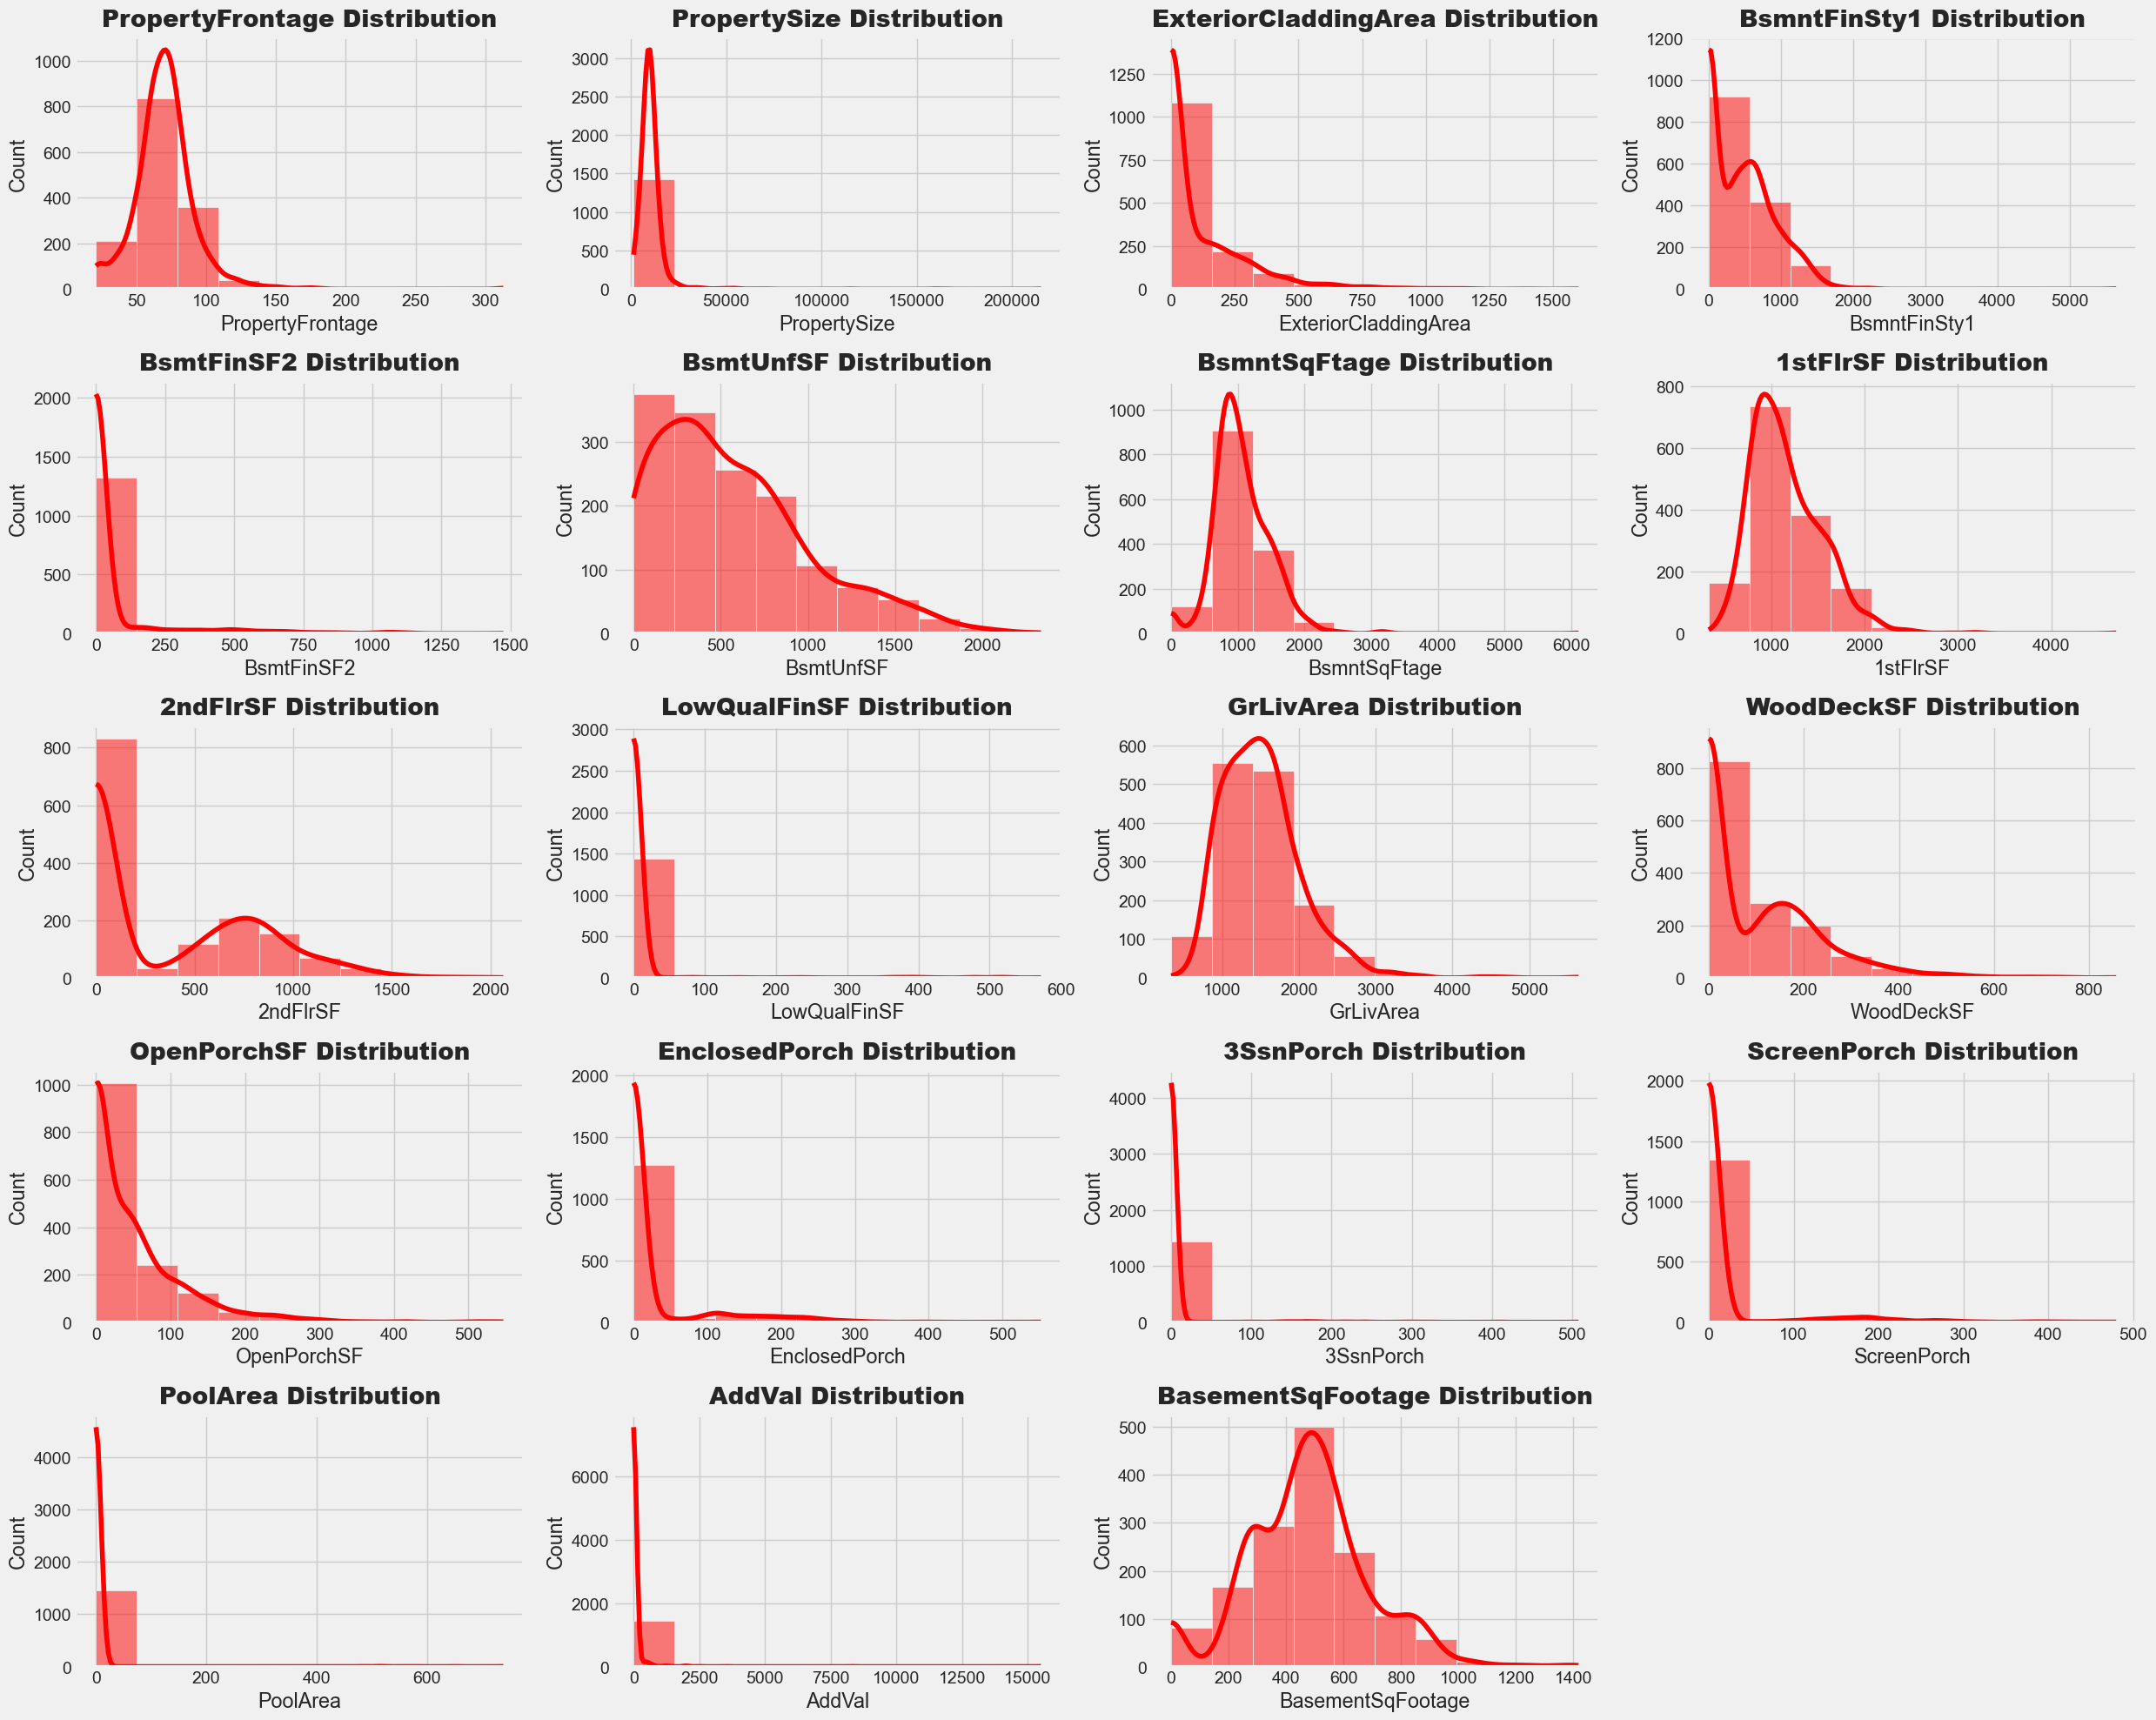

In [27]:
plt.figure(figsize=(25,20))
for index,column in enumerate(con_cols):
    plt.subplot(5,4,index+1)
    sns.histplot(data[column],bins=10,kde=True,color="red")
    plt.title(f"{column} Distribution",fontweight="black",size=20,pad=10)
    plt.tight_layout()

### Inference:
##### None of the features other than BasementSqFootage is having a normal distribution and all the features is right-skewed.
##### We know that Linear regression models assume a linear relationship between the predictors and the response variable.
##### Since the relationship is non-linear, transforming the variables can help capture and represent the underlying non-linear relationship more accurately.

### Visualizing the Skewness of Continous Numerical Features.

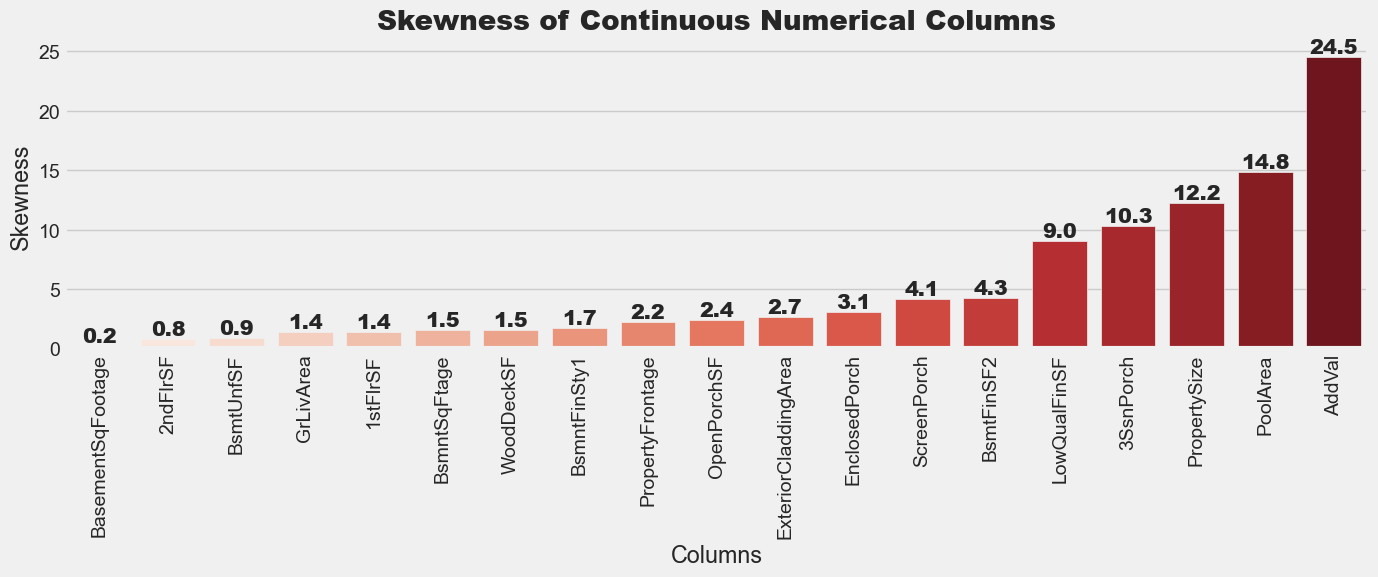

In [28]:
skewness = data[con_cols].skew().sort_values()

plt.figure(figsize=(14,6))
sns.barplot(x=skewness.index,y=skewness,palette=sns.color_palette('Reds',19))
for i, v in enumerate(skewness):
    plt.text(i,v, f"{v:.1f}", ha="center", va="bottom",size=15,fontweight="black")

plt.ylabel('Skewness')
plt.xlabel('Columns')
plt.xticks(rotation=90)
plt.title('Skewness of Continuous Numerical Columns',fontweight='black',size=20, pad=10)
plt.tight_layout()
plt.show()

### Inference:
##### Features like 3SsnPorch,LowQualFinSF,LotArea,PoolArea and MiscVal are having extremly high skewness which can create model-complexity.
##### We know that skewness should be near to zero for a normal distrbution to achieve that we can use different transformations.

### Visualizing the Correlation of Continous Numerical Features.¶

In [29]:
con_cols.append("PropPrice")


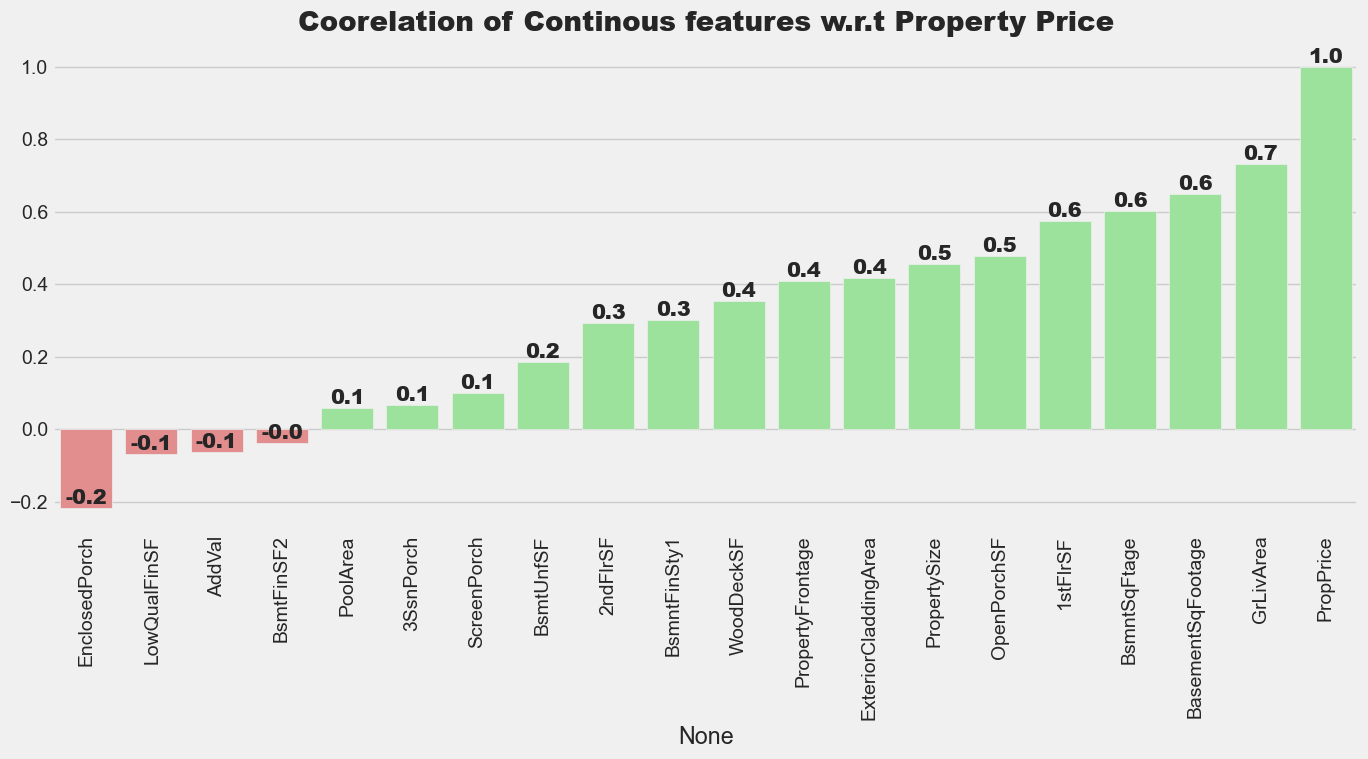

In [30]:
corr= data[con_cols].corrwith(data["PropPrice"],method="spearman").sort_values()

plt.figure(figsize=(15,6))
sns.barplot(x=corr.index,y=corr.values,palette=["lightcoral" if v<0 else "lightgreen" for v in corr])
for i,v in enumerate(corr):
    plt.text(i,v,f"{v:.1f}", ha = "center", va ="bottom", size=15, fontweight="black")

plt.title("Coorelation of Continous features w.r.t Property Price", fontweight="black",size=20,pad=10)
plt.xticks(rotation=90)
plt.show()

### Inference:
##### Feature like 1stFlrSF, BsmntSqFtage, GrLivArea are having string co-relation with the target variable.
##### Features like WoodDeckSF, PropertyFrontage and ExteriorCladdingArea have moderate co-relation with our target variable.
##### Features like LowQualFinSF,AddVal,BsmtFinSF2,PoolArea,3SsnPorch,EnclosedPorch and ScreenPorch are having very low relation with the target variable. So if required we can drop this features.

### Visualizing Categorical Features w.r.t SalePrice.¶

In [31]:
cat_cols= data.select_dtypes(include="object").columns.tolist()

In [32]:
cat_cols

['PropertyZone',
 'Street',
 'PropertyShape',
 'Elevation',
 'Amenities',
 'Orientation',
 'Grade',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'PropertyStyle',
 'RoofStyle',
 'RoofMatl',
 'Roof1Material',
 'Roof2Material',
 'ExterQual',
 'ExterCond',
 'PropertyFooting',
 'BsmntFinish',
 'BsmntMaintenance',
 'BsmntVisibility',
 'BsmntFinRat1',
 'BsmntFinQual1',
 'Heating',
 'HeatingEfficiency',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'BasementType',
 'BasementYrBlt',
 'BasementFinish',
 'BasementQual',
 'BasementCond',
 'PavedDrive',
 'SaleType',
 'SaleCondn']

In [33]:
def boxplot(col_list):
    plt.figure(figsize=(22,12))
    for index, column in enumerate(col_list):
        plt.subplot(2,4,index+1)
        sns.boxplot(x=column, y="PropPrice", data=data)
        plt.title(f"{column} vs PropPrice", fontweight="black", pad=10,size=20)
        plt.xticks(rotation=90)
        plt.tight_layout()

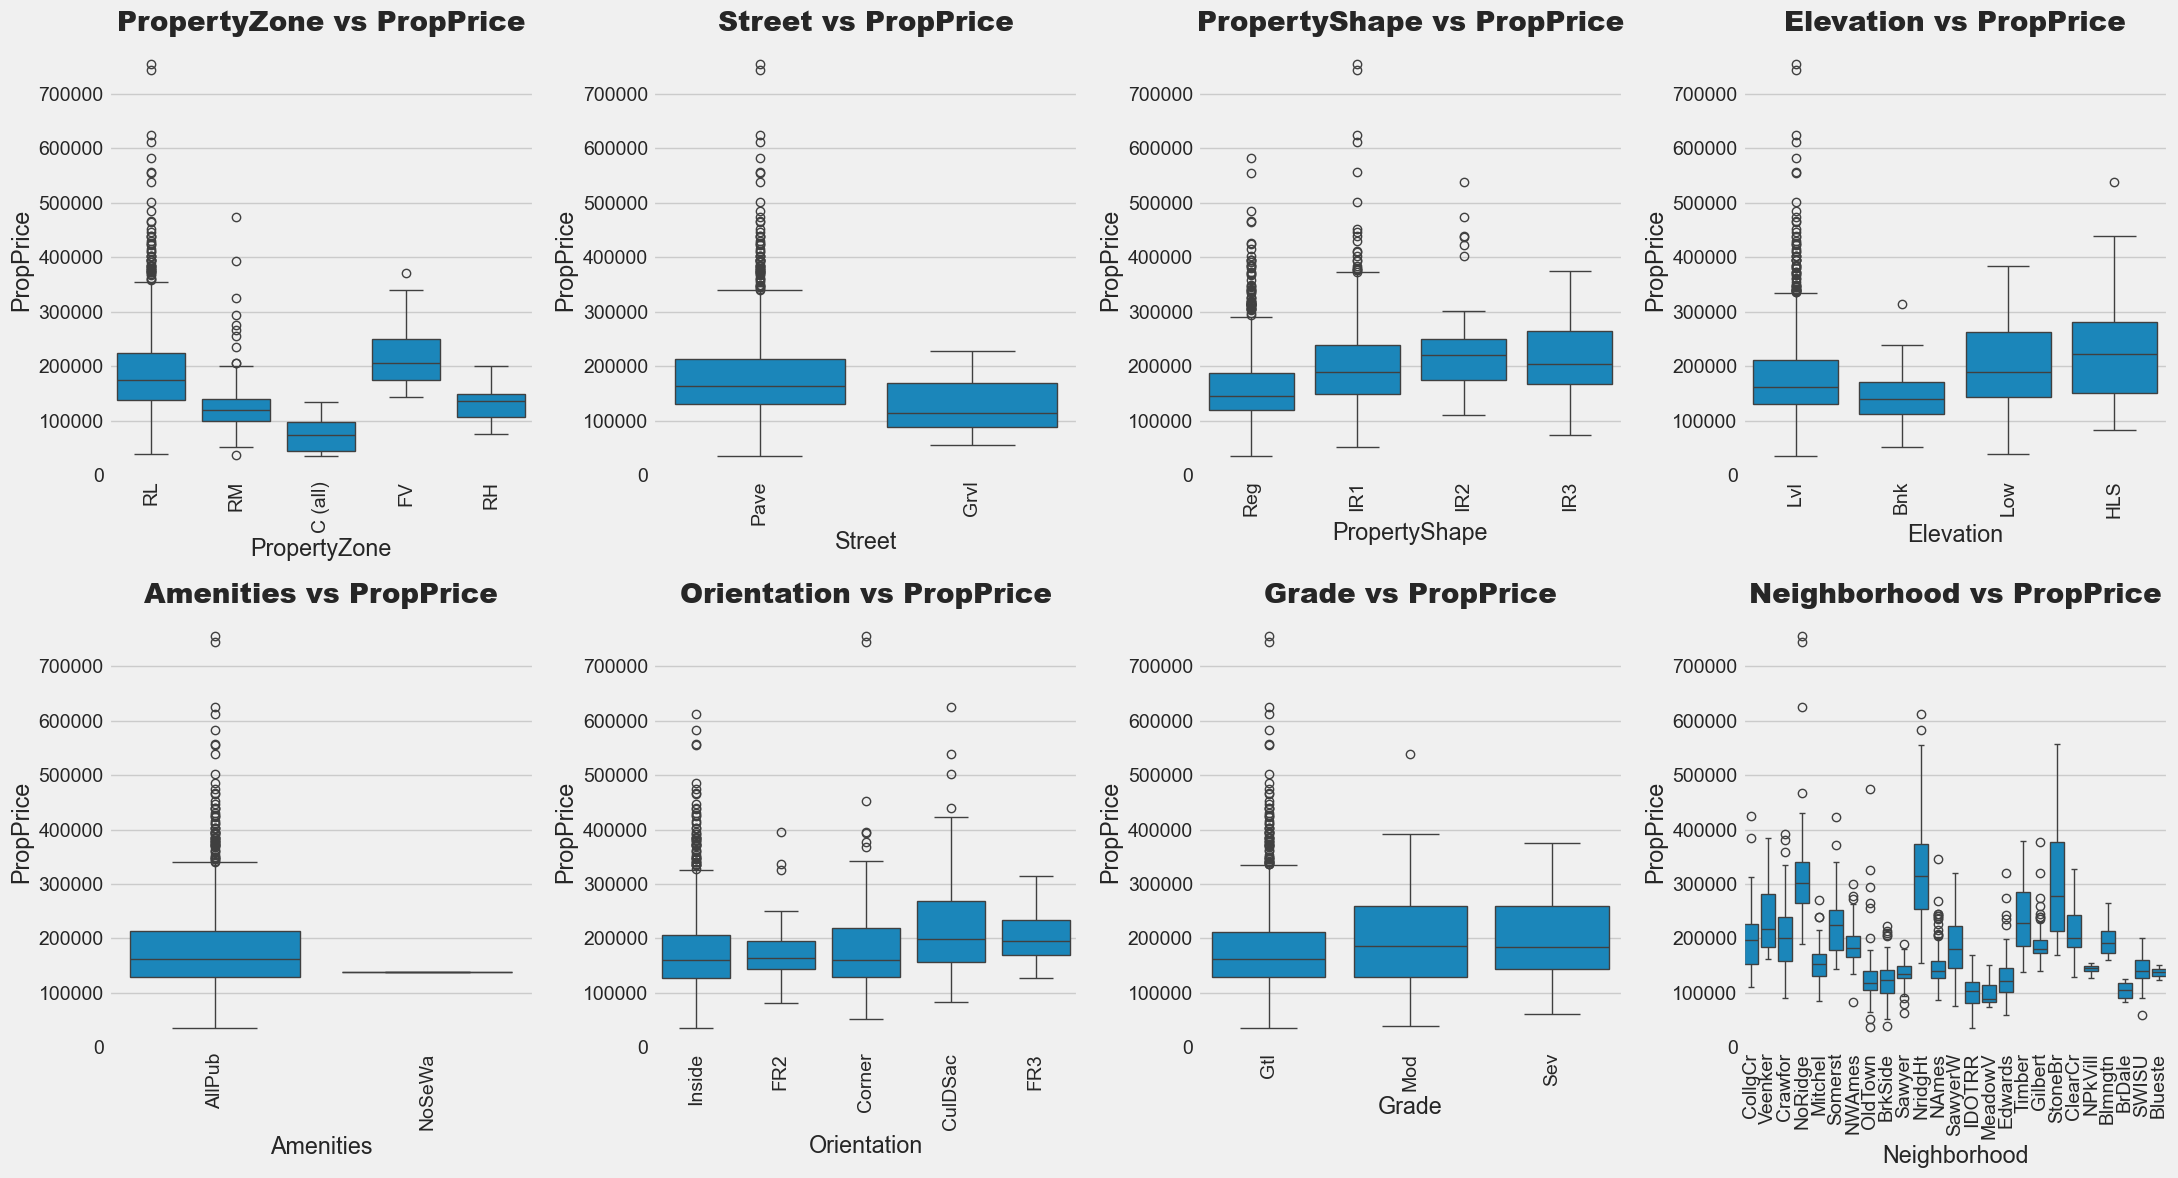

In [34]:
boxplot(cat_cols[0:8])

### Inference:
##### Features like Ameniities and Street are having very high class imbalance. So we can simply drop this features.
##### Neighborhood feature is having high cardinality, So we have to perform Target Encoding on this feature.

#### Dropping Columns with High Class Imbalance

In [35]:
data.drop(columns=["Amenities","Street"],inplace=True)

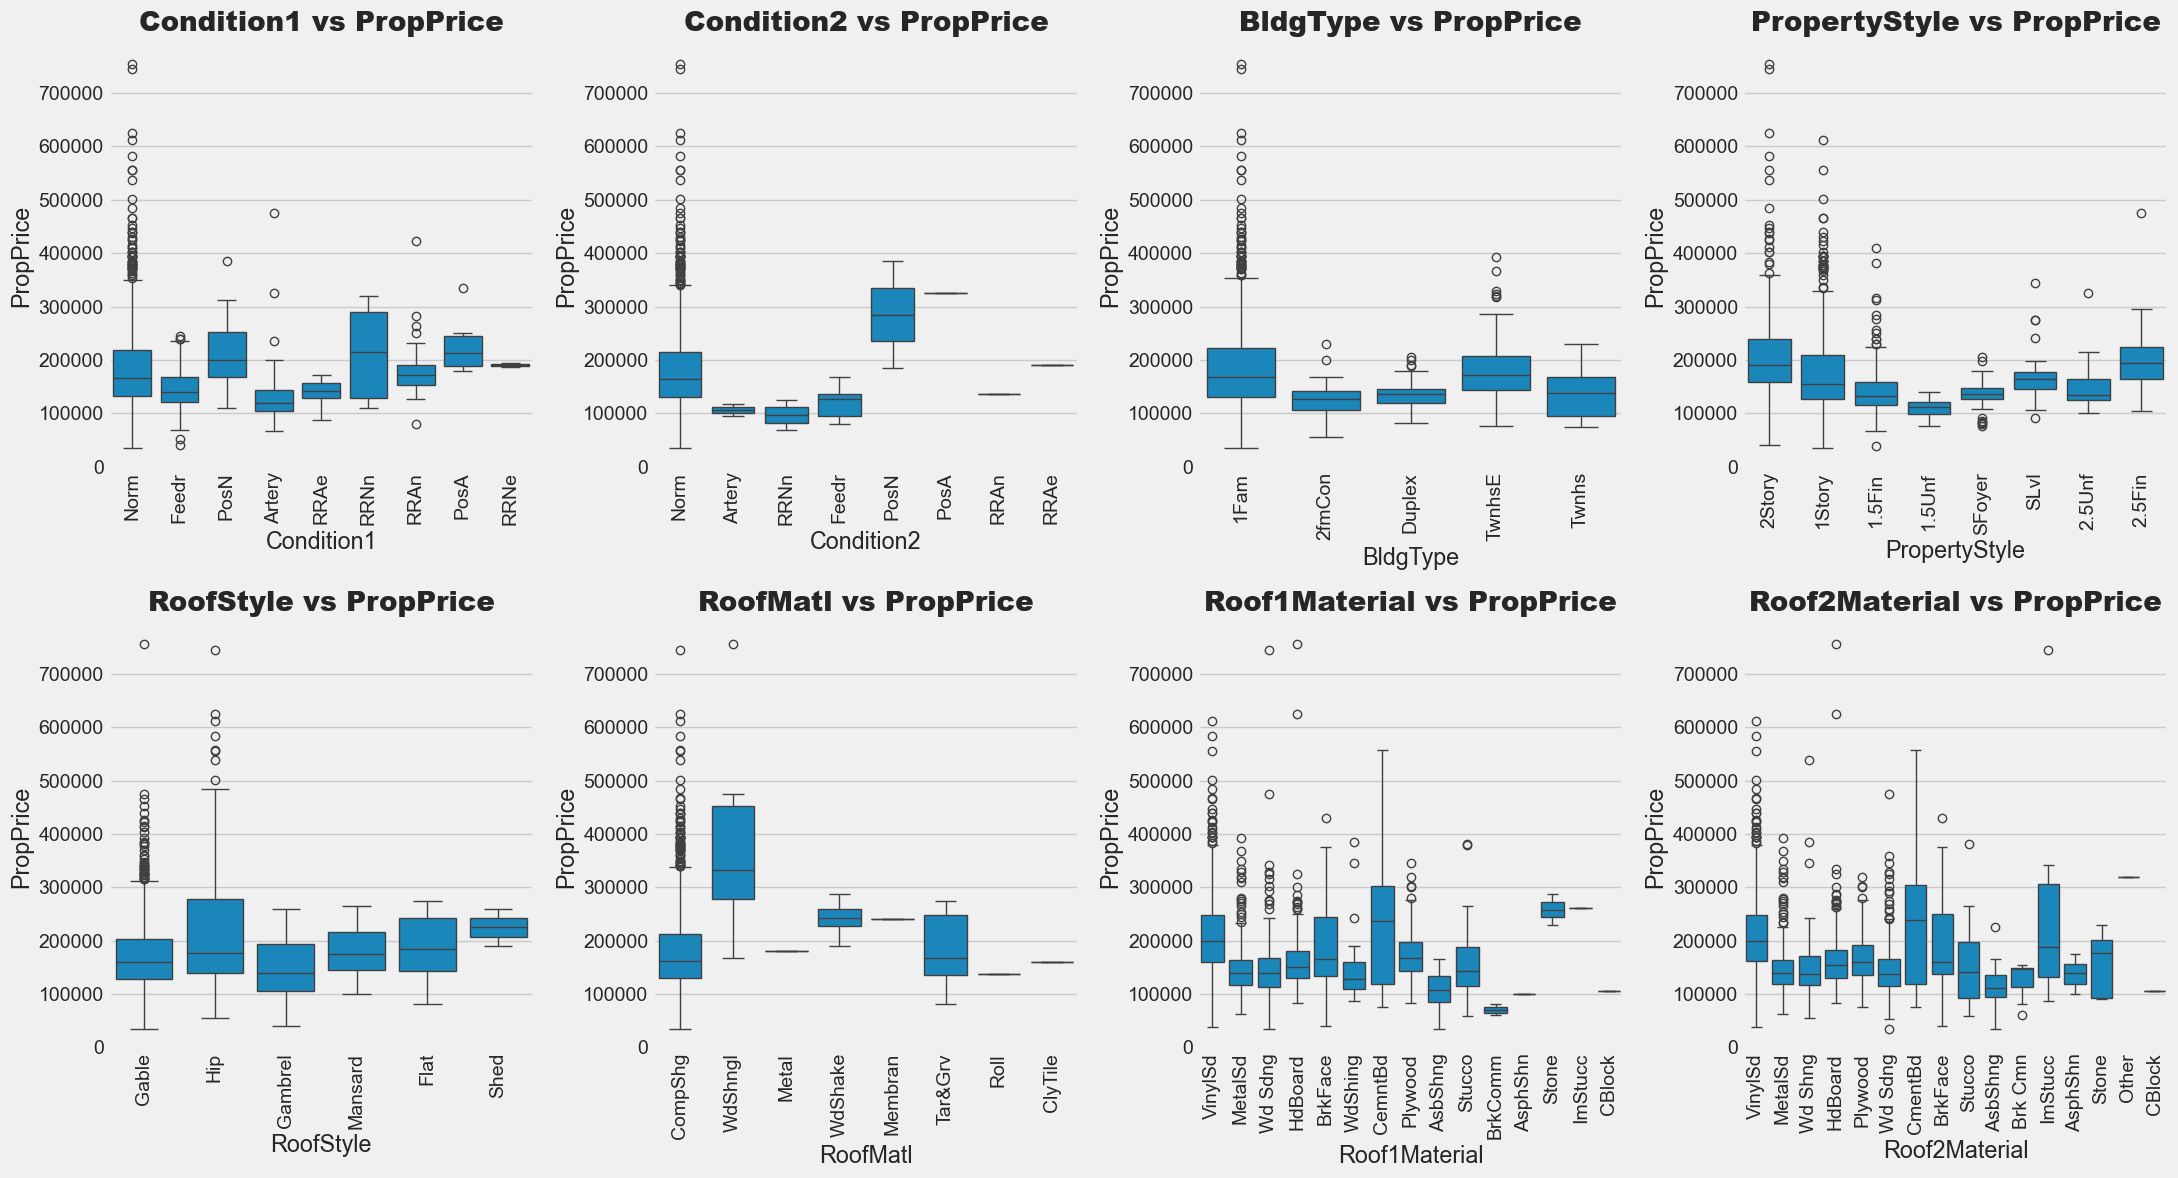

In [36]:
boxplot(cat_cols[8:16])

### Inference:
##### Features like Condition2 and RoofMatl are having very high class imbalance.
##### We can drop RooftMatl feature and we will fo feature engineering on condition2 to reduce the class-imbalance.


#### Dropping feature with high class-imbalance.

In [37]:
data.drop(columns=["RoofMatl"],inplace=True)

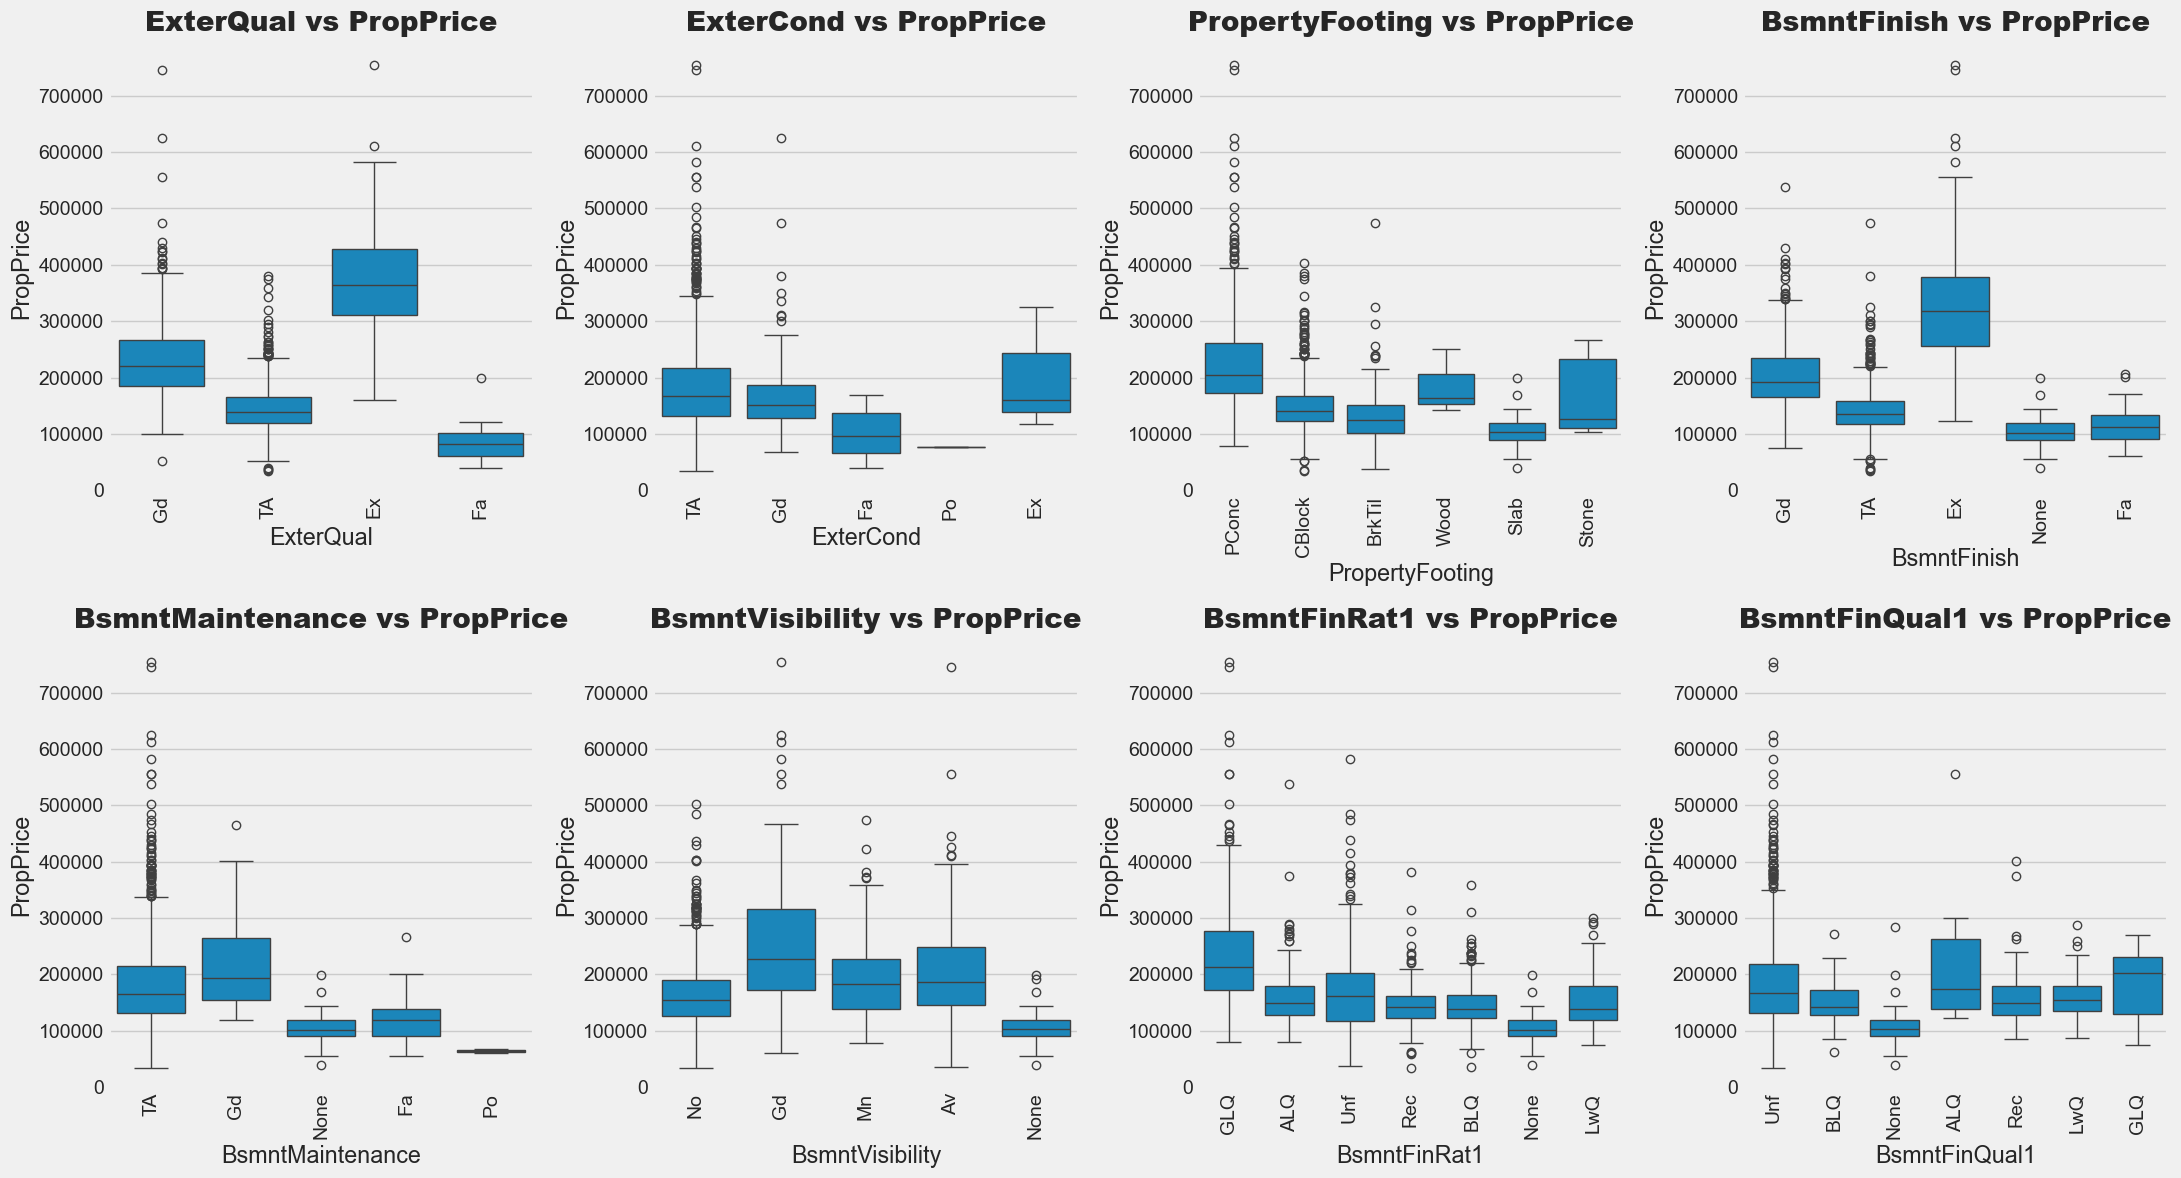

In [38]:
boxplot(cat_cols[16:24])

### Inference:
##### All the features in above visualization seems very useful for predicting the price of house.
##### The only thing is that we have to perform enconding before model training.

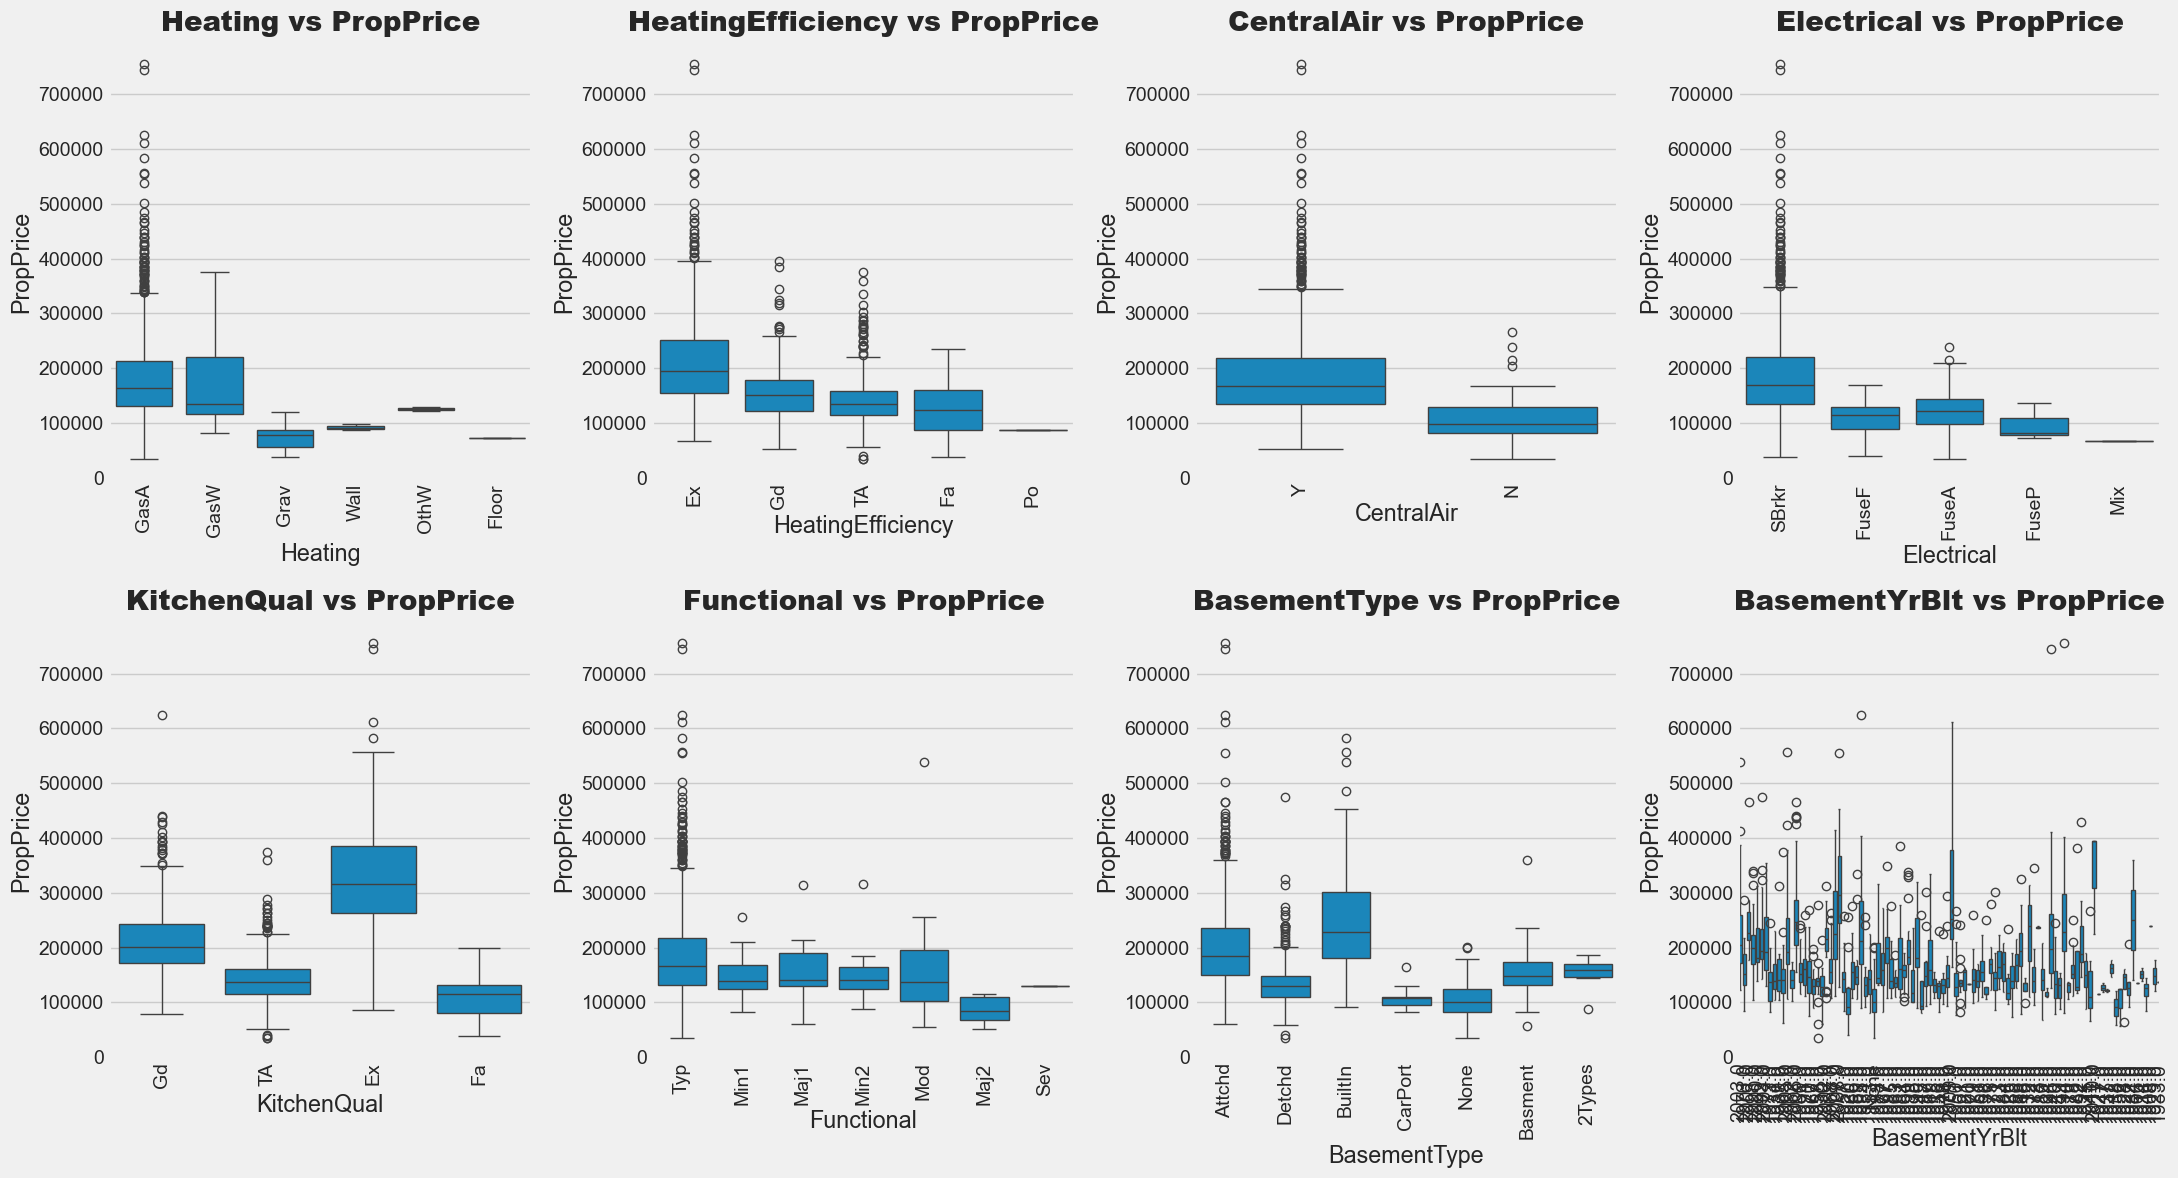

In [39]:
boxplot(cat_cols[24:32])

### Inference:
##### All the features in above visualization seems very useful for predicting the price of house.
##### The only thing is that we have to perform enconding before model training.

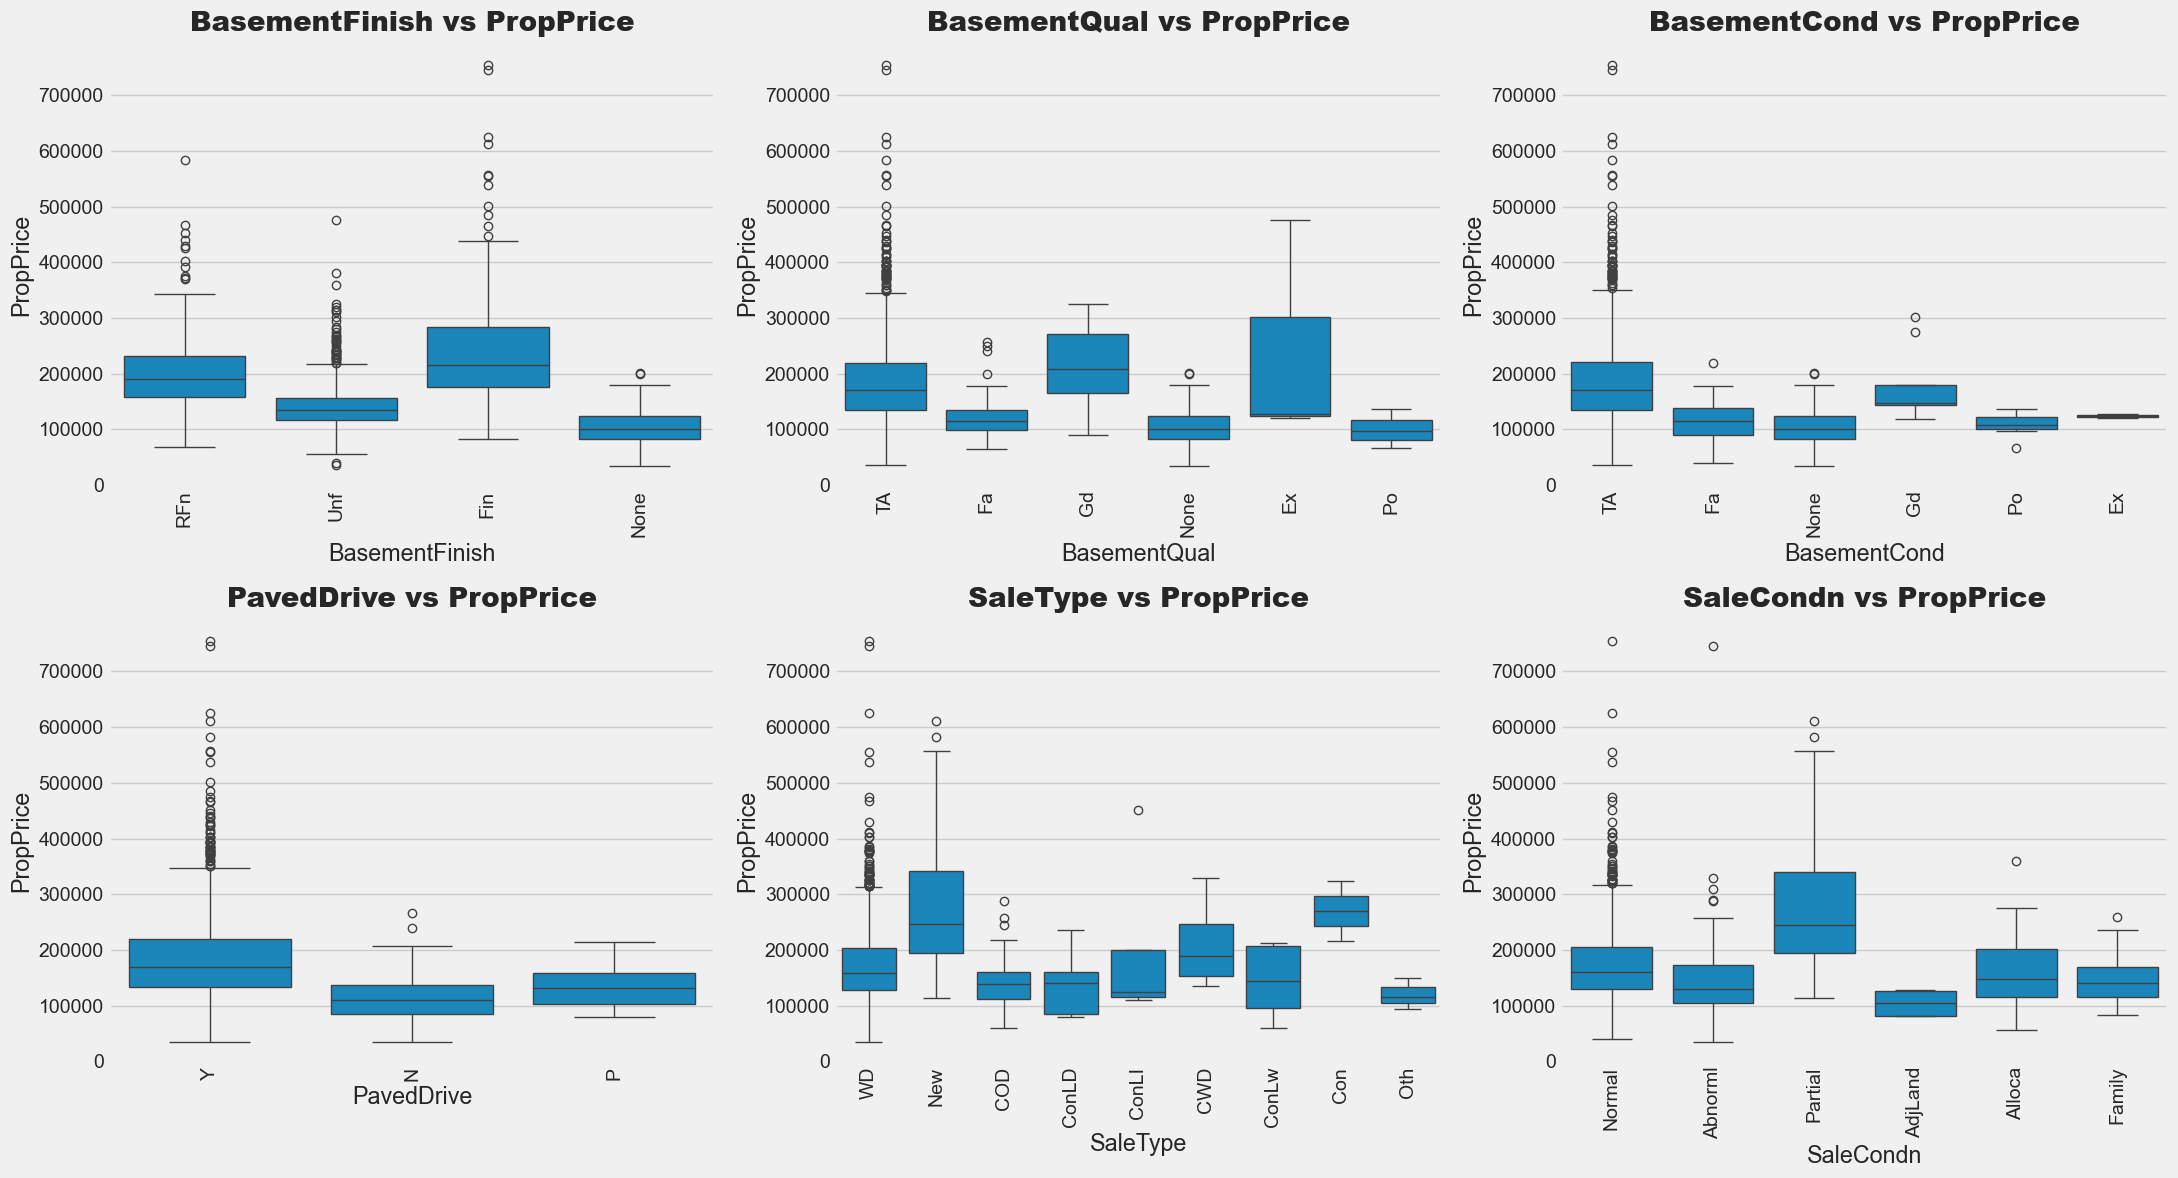

In [40]:
plt.figure(figsize=(22,12))
for index,column in enumerate(cat_cols[32:]):
    plt.subplot(2,3,index+1)
    sns.boxplot(x=column, y="PropPrice", data=data)
    plt.title(f"{column} vs PropPrice",fontweight="black",pad=10,size=20)
    plt.xticks(rotation=90)
    plt.tight_layout()

### Inference:
##### All the features in above visualization seems very useful for predicting the price of house.
##### The only thing is that we have to perform enconding before model training.

### Visualizing Discrete Numerical Features w.r.t Average "SalePrice".

In [41]:
dis_cols = ["OverallQual","OverallCond","BsmtFullBath","BsmtHalfBath","Bath1","Bath2","BedroomUpLev",
            "KitchenUpLev","CntRmsUpLev","CntFireplaces","SaleMon","BasementCars"]

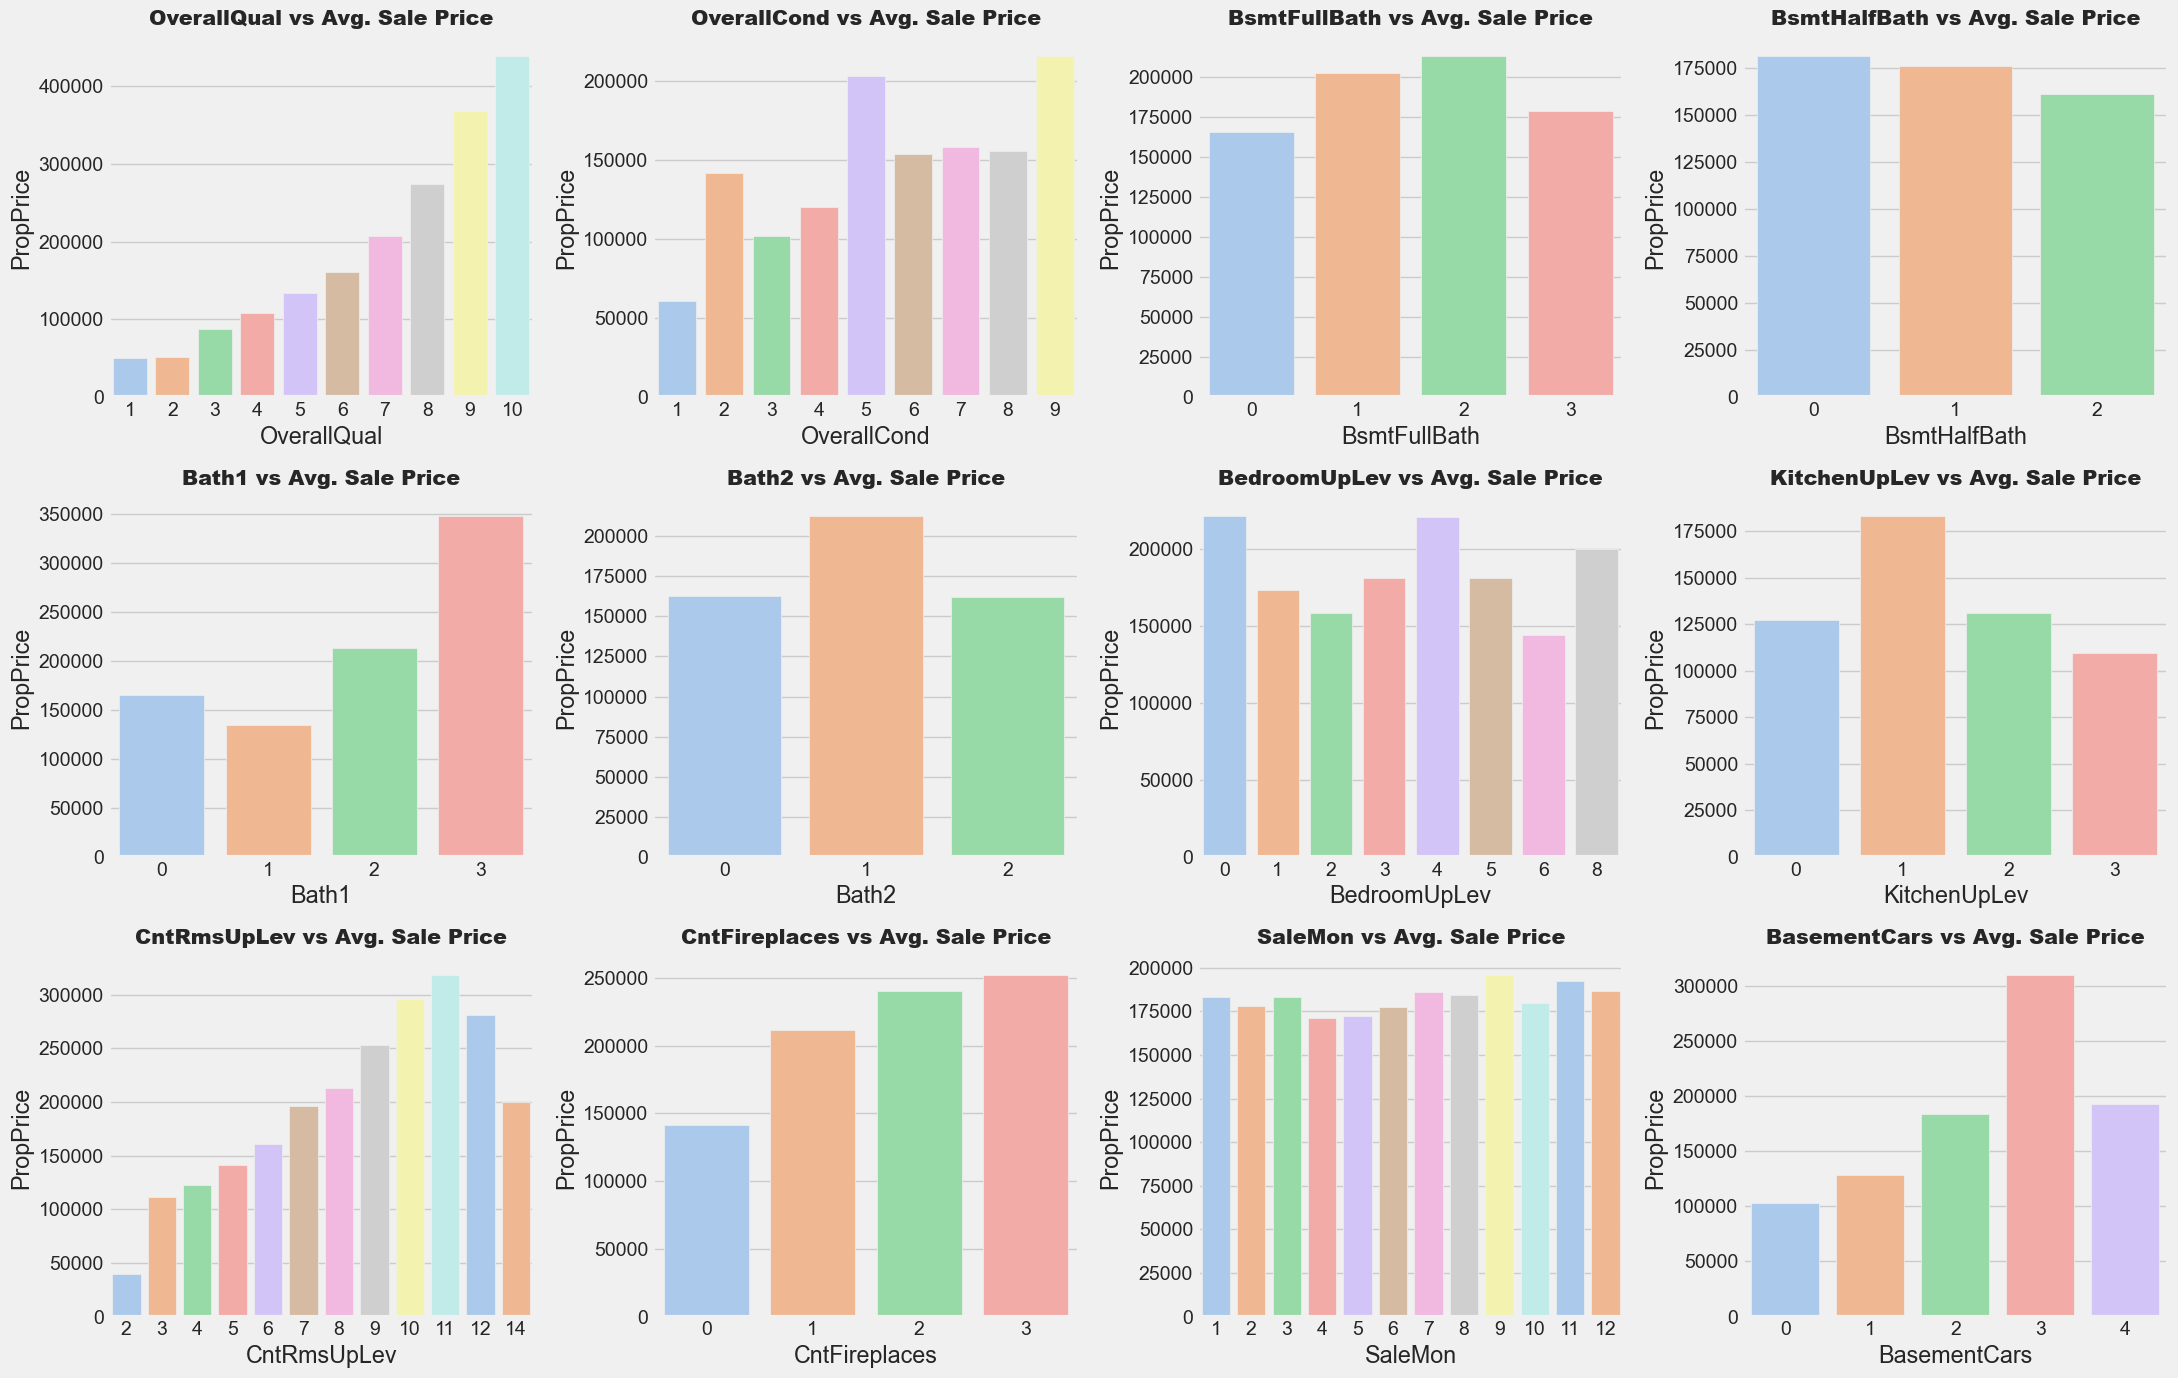

In [42]:
plt.figure(figsize=(22,14))
for index,column in enumerate(dis_cols):
    DF= data.groupby(column)["PropPrice"].mean()
    plt.subplot(3,4,index+1)
    sns.barplot(x=DF.index,y=DF,palette="pastel")
    plt.title(f"{column} vs Avg. Sale Price",fontweight="black",size=15,pad=10)
    plt.tight_layout()

### Inference:
##### OverallQual,Bath1,CntRmsAbvGrd, CntFirePlaces and BasementCars are having strong positive relation with the SalePrice.

##### KitchenUpLev is having a negative correlation with SalePrice.

##### So all these above features seems useful for predicting Saleprice.


## Feature Engineering

### 1.Creating Two New Features "RenovationStatus" and "AgeAtSale" of the House.

##### SaleYear : Year Sold
##### YearBuilt : Original Construction Date
##### YearRemodAdd: Remodel date
##### Note:
##### First we can create a binary feature that indicates whether the house underwent construction or not.
##### Second we can create a Discrete numerical feature that indicates the age of house.
##### This features can provide valuable information about the remodeling history of the property and potentially impact the sale price.

In [43]:
data["RenovationStatus"]=(data["YearBuilt"] != data["YearRemodAdd"]).astype(int)                       

In [44]:
data["AgeAtSale"]= data["SaleYr"]-data["YearBuilt"]

### Dropping the Unwanted Features.

In [45]:
data.drop(columns=["SaleYr","YearBuilt","YearRemodAdd"],inplace=True)

#### Visualizing the New Features Created.

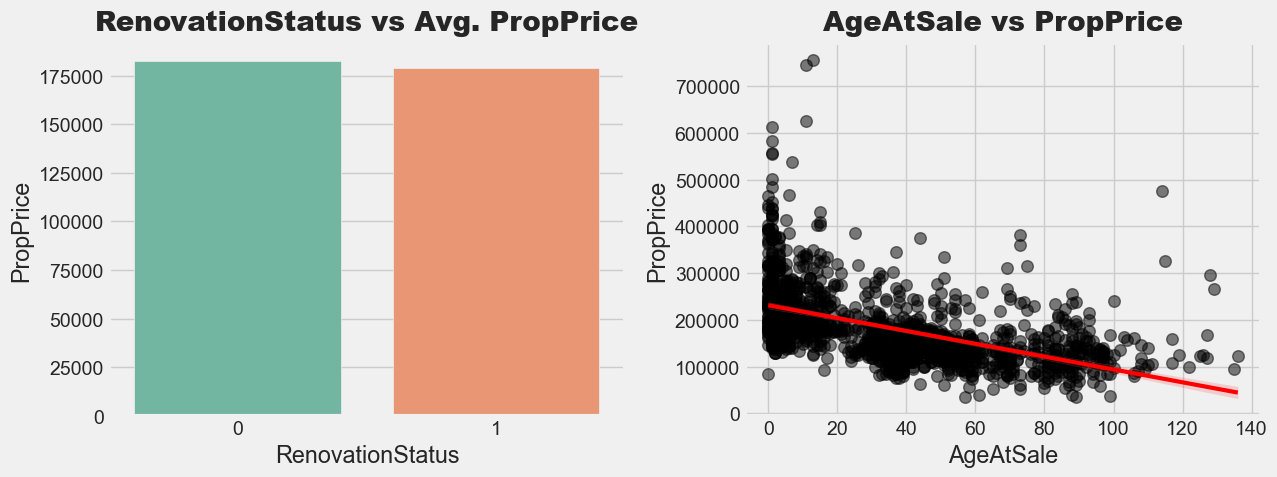

In [46]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
vdata=data.groupby("RenovationStatus")["PropPrice"].mean()
sns.barplot(x=vdata.index,y=vdata,palette="Set2")
plt.title("RenovationStatus vs Avg. PropPrice",pad=10,size=20,fontweight="black")
plt.subplot(1,2,2)
sns.regplot(x=data["AgeAtSale"],y=data["PropPrice"],color="black", scatter_kws={'s': 70, 'alpha': 0.5}, 
                line_kws={'color': 'red', 'lw': 3})
plt.title("AgeAtSale vs PropPrice",pad=10,size=20,fontweight="black")
plt.tight_layout()
plt.show()

### Inference:
##### The SalePrice for both the RenovationStatus cateegory is approxiamately same.
##### There is a negative correlation between AgeAtSale & SalePrice. So this new feature seems very useful for model training.

### 2. Creating a New Feature using all the columns storing "Bathroom Values."

In [47]:
data["Total_Bathrooms"] = (data["Bath1"] + (0.5 * data["Bath2"]) + 
                               data["BsmtFullBath"] + (0.5 * data["BsmtHalfBath"]))

#### Visualiing "Total_Bathrooms" w.r.t Average "SalePrice"

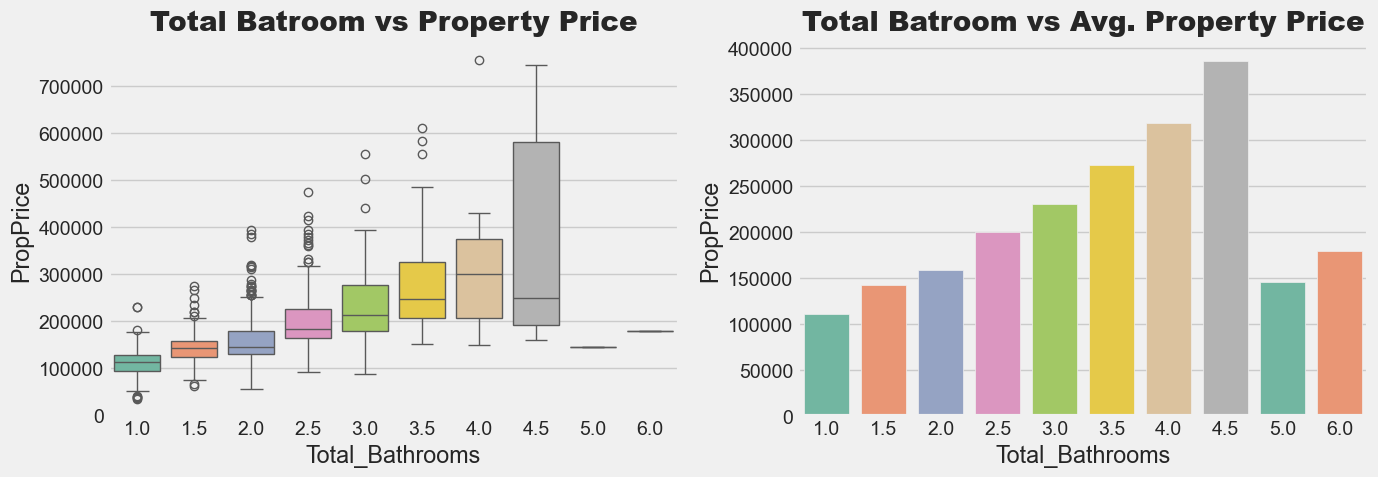

In [48]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.boxplot(x=data["Total_Bathrooms"],y=data["PropPrice"], palette="Set2")
plt.title("Total Batroom vs Property Price",fontweight="black",size=20,pad=10)

plt.subplot(1,2,2)
avg = data.groupby("Total_Bathrooms")["PropPrice"].mean()
sns.barplot(x=avg.index,y=avg,palette="Set2")
plt.title("Total Batroom vs Avg. Property Price",fontweight="black",size=20,pad=10)
plt.tight_layout()
plt.show()

### Inference:
##### We can clearly observe a strong positive correlation between Total Bathrooms and SalePrice.
##### There's a class-imbalance because there are only 1 record for Total Bathrooms 5 & 6.
##### But still this feature seems important very important for predicting Saleprice.

#### 3. Creatng a New Feature using all the columns related to "porch".

In [62]:
data['Total_Porch_SF'] = (data['OpenPorchSF'] + data['3SsnPorch'] + data['EnclosedPorch'] +
                              data['ScreenPorch'] + data['WoodDeckSF'])


#### Visualizing All these Features

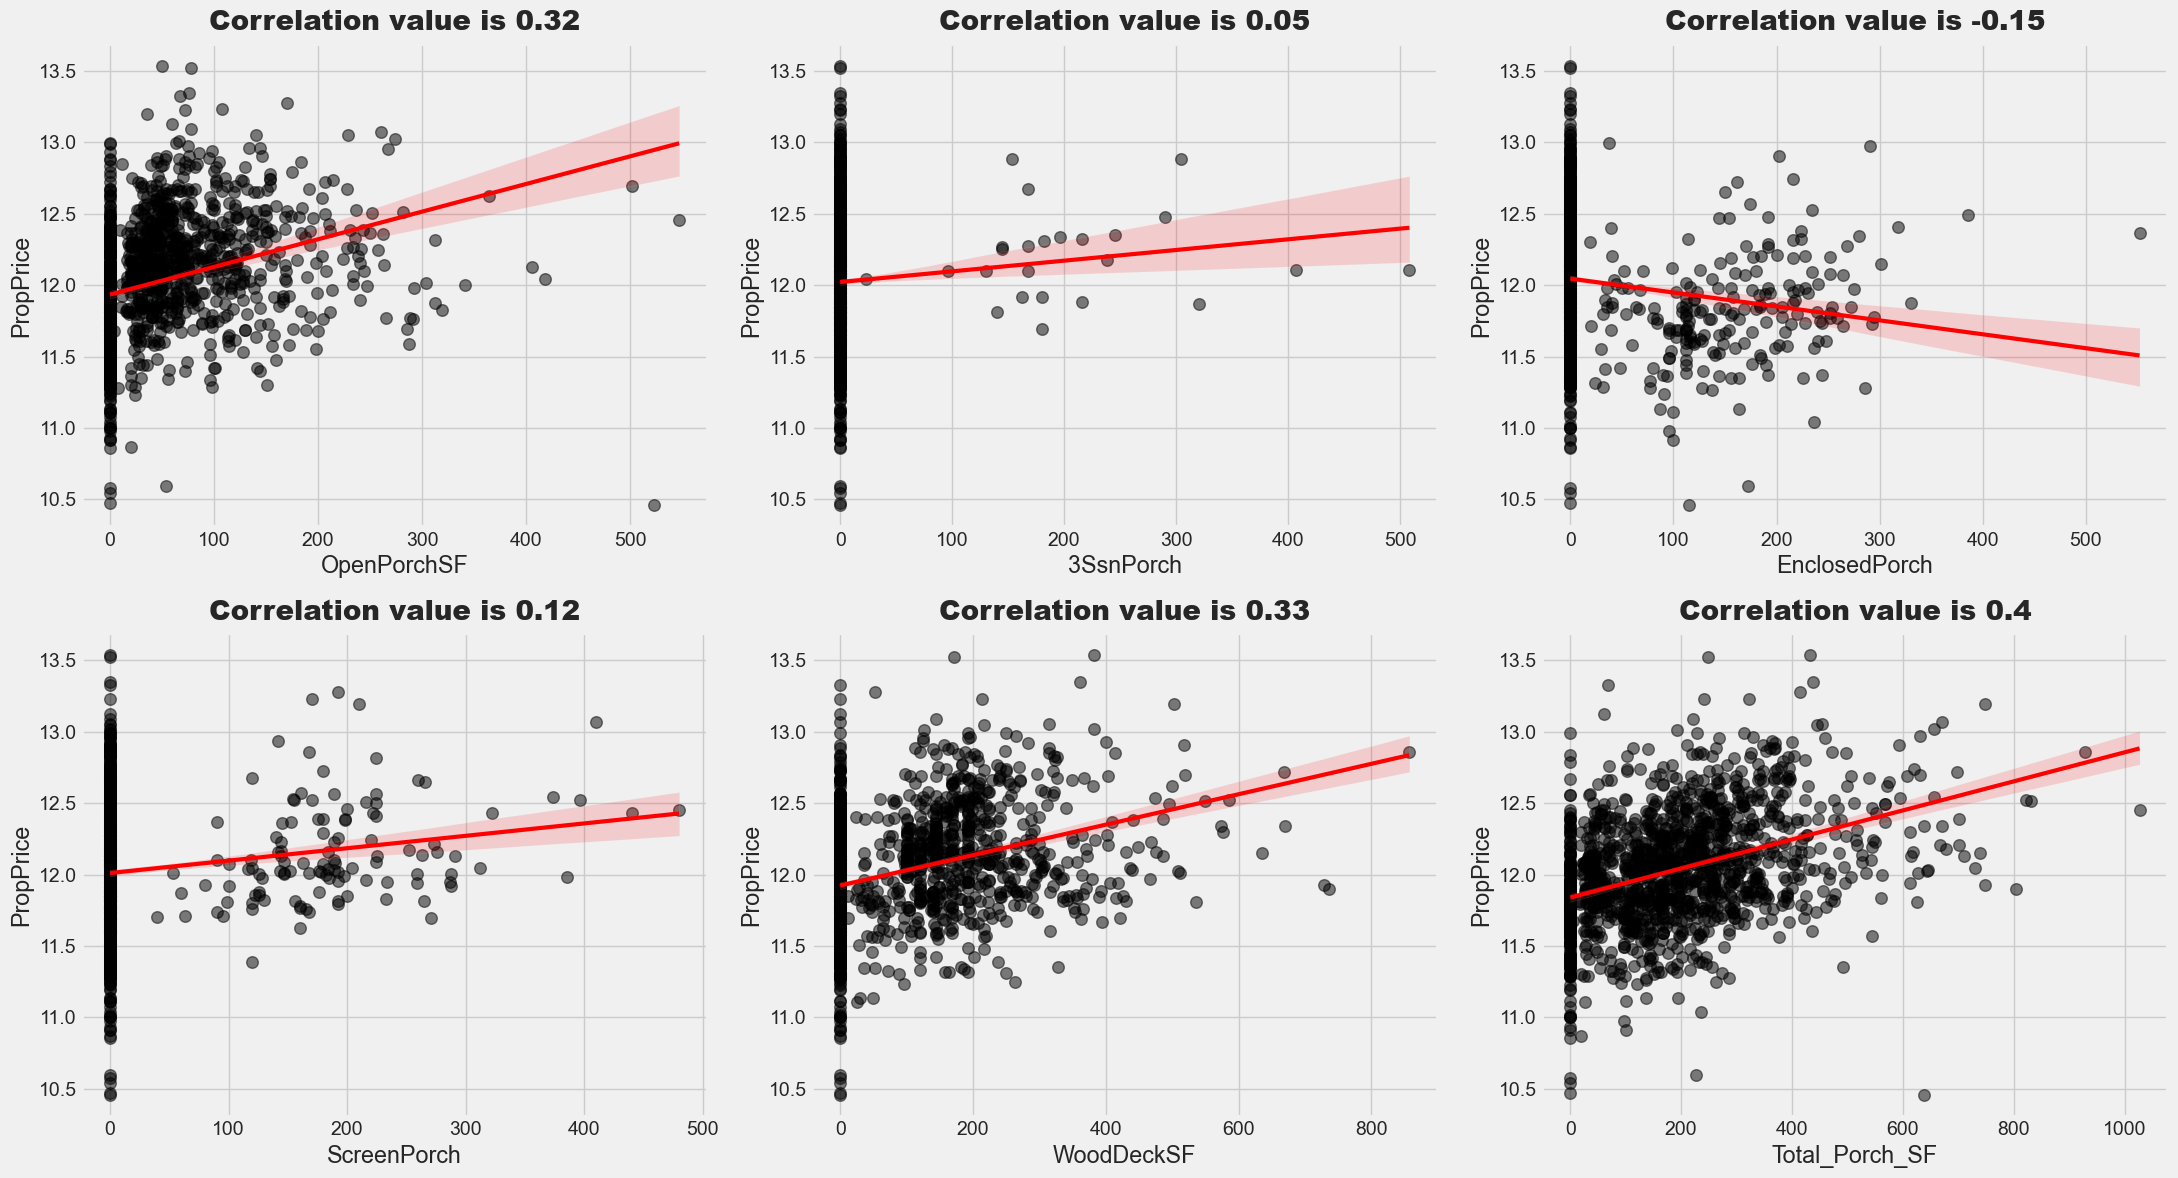

In [64]:
cols = ["OpenPorchSF","3SsnPorch","EnclosedPorch","ScreenPorch","WoodDeckSF","Total_Porch_SF"]

plt.figure(figsize=(22,12))
for index,column in enumerate(cols):
    plt.subplot(2,3,index+1)
    sns.regplot(x=data[column],y=data["PropPrice"],color="black", scatter_kws={'s': 70, 'alpha': 0.5}, 
                line_kws={'color': 'red', 'lw': 3})
    corr = round(data[[column,"PropPrice"]].corr()["PropPrice"][0],2)
    plt.title(f"Correlation value is {corr}",pad=10,size=20,fontweight="black")
    plt.tight_layout()

#### Inference:
#### Feature like OpenPorchSF,WoodDeckSF and Total_Porch_SF are having moderate correlation.So these are useful features.

#### Feature like 3SsnPorch,EnclosedPorch, and ScreenPorch are having weak correlation.So we can simply drop this features.

#### Dropping features with weak Correlation

In [66]:
cols = ["3SsnPorch","EnclosedPorch","ScreenPorch"]

data.drop(columns=cols,inplace=True)

### 4. Creating a New Feature Using "Sqaure Footage".

In [71]:
data['Total_sqr_footage']=(data['BsmntFinSty1']+data['BsmtFinSF2']+data['1stFlrSF']+data['2ndFlrSF'])


#### Visualizing all these Features

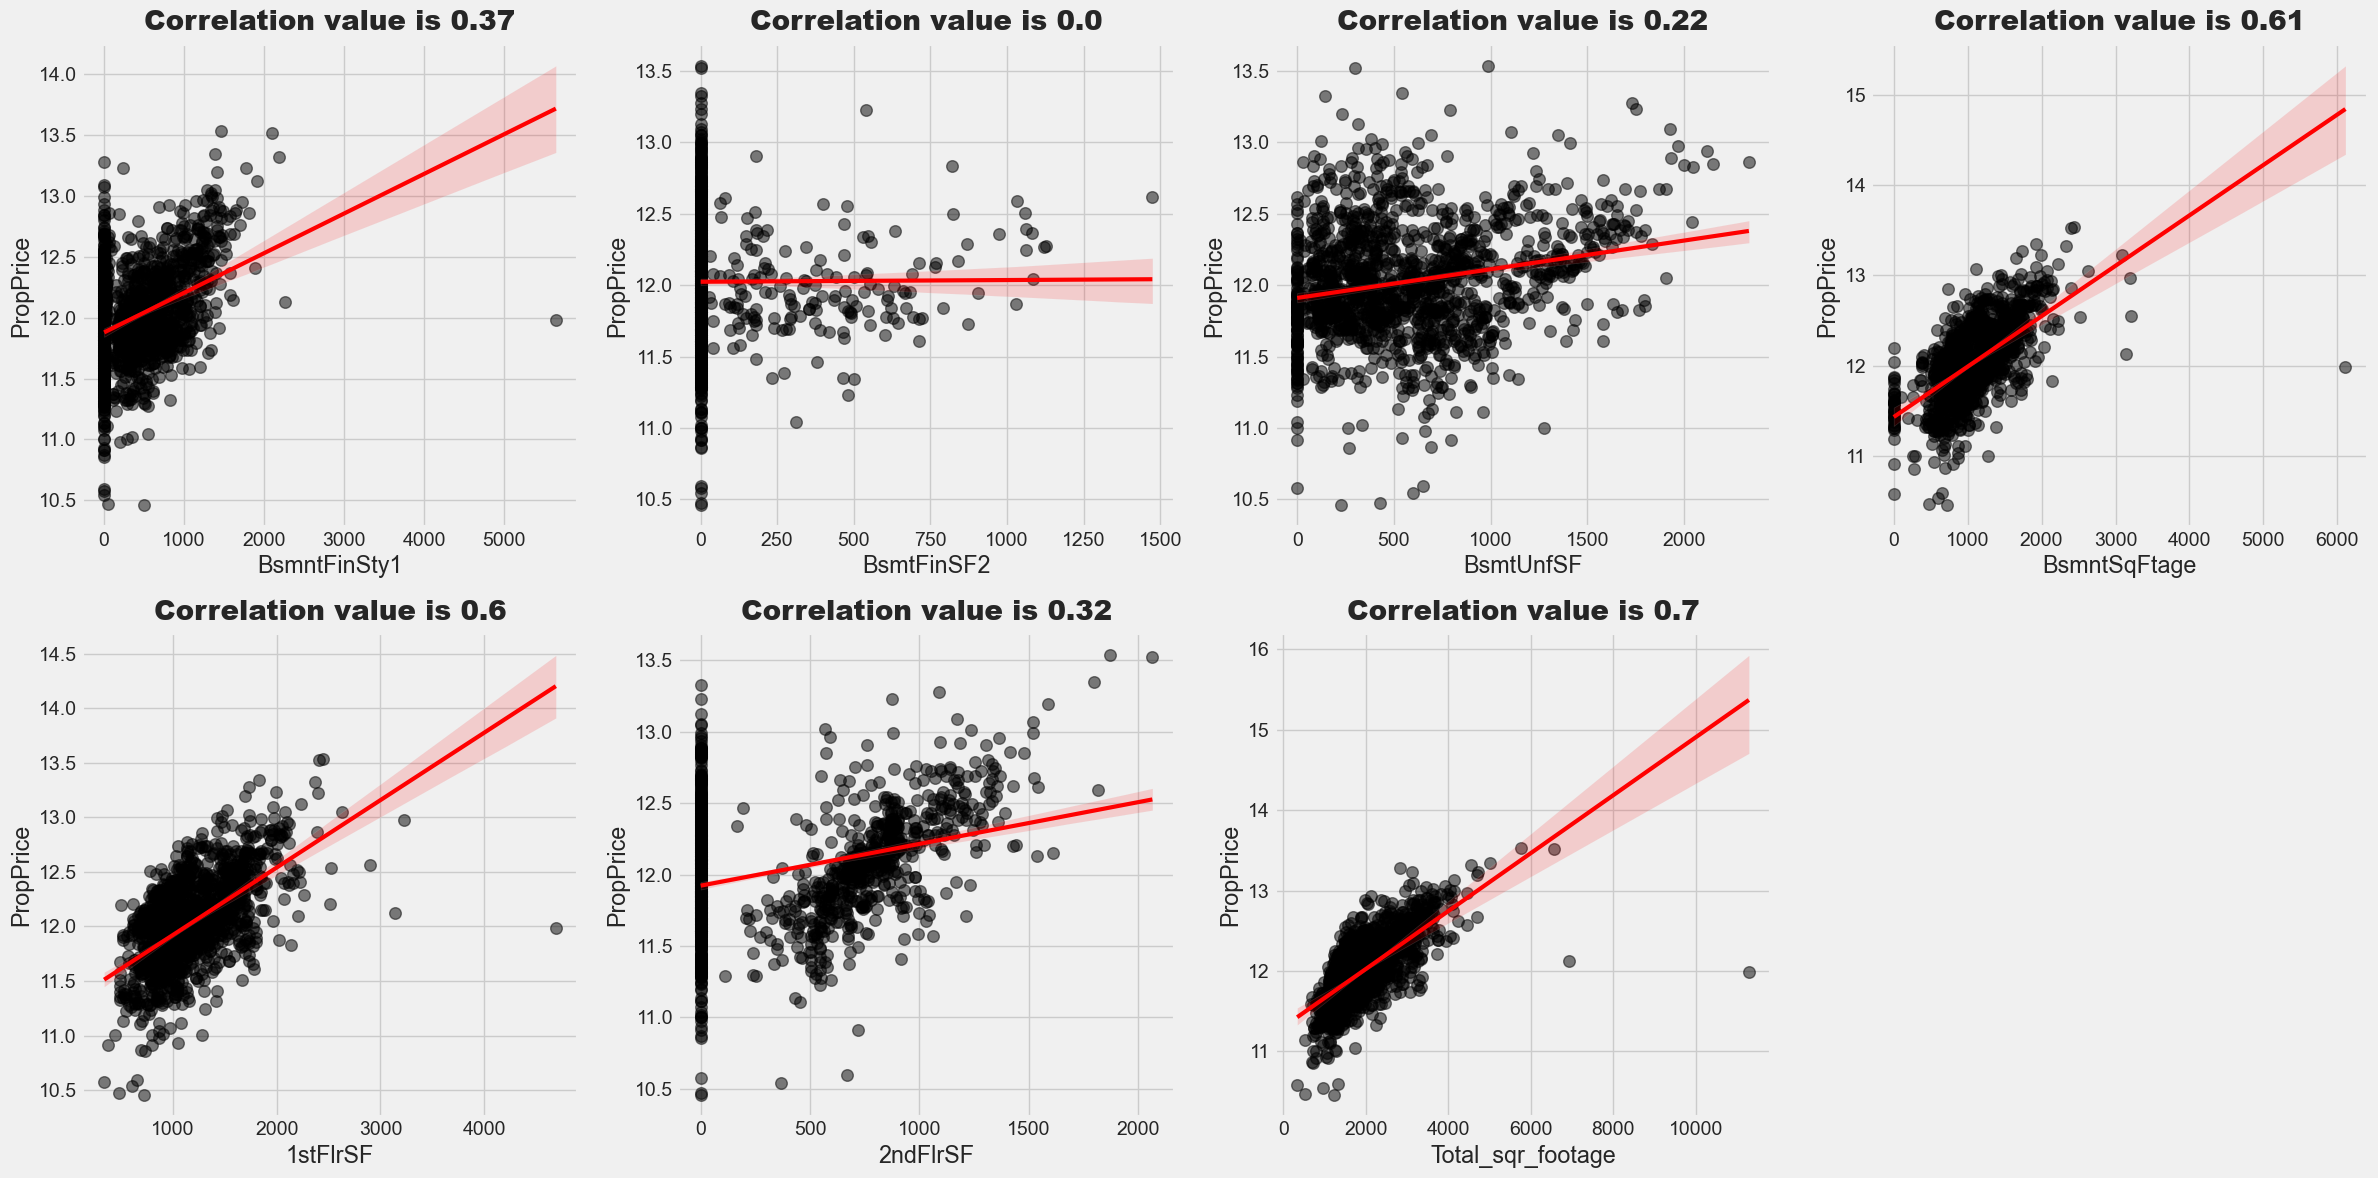

In [76]:
cols = ["BsmntFinSty1","BsmtFinSF2","BsmtUnfSF","BsmntSqFtage","1stFlrSF","2ndFlrSF","Total_sqr_footage"]

plt.figure(figsize=(24,12))
for index, column in enumerate(cols):
    plt.subplot(2,4,index+1)
    sns.regplot(x=data[column],y=data["PropPrice"],color="black",scatter_kws={'s':70,'alpha':0.5},line_kws={'color':'red','lw':3})
    corr= round(data[[column,"PropPrice"]].corr()["PropPrice"][0],2)
    plt.title(f"Correlation value is {corr}",pad=10,size=20,fontweight="black")
    plt.tight_layout()

### Inference:
##### The new feature Total_sqr_footage and 1stFlrSF are having very high correlation with the target varibale.
##### Features like BsmtFinSty1,BsmntSqFtage, and 2ndFlrSF are having modearte correlation with the target variable.
##### Features like BsmtFinSF2 and BsmtUnfSF are having very weak correaltion witht the target variable. So we can simply drop those featues.

#### Dropping Features with weak correaltion

In [77]:
cols=["BsmtFinSF2","BsmtUnfSF"]
data.drop(columns=cols,inplace=True)

### 5. Creating New Feature using "Heating" Feature.

In [82]:
data["HeatingQuality"] = data["Heating"] + "-" + data["HeatingEfficiency"]

#### Dropping Features which are not required anymore

In [83]:
data.drop(columns=["Heating","HeatingEfficiency"],inplace=True)

## Data Preprocessing - Part 2 

#### 1. Performing Log Transformation on Target variable.

In [49]:
z= data["PropPrice"]
data["PropPrice"]=np.log1p(data["PropPrice"])

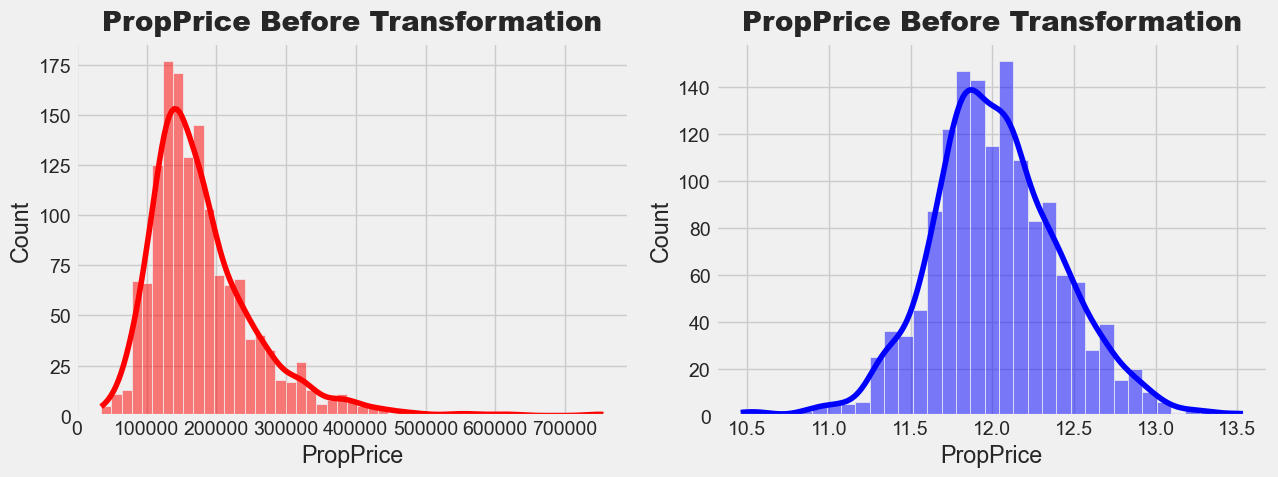

In [50]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.histplot(z,color="red",kde=True)
plt.title("PropPrice Before Transformation",size=20,pad=10,fontweight="black")

plt.subplot(1,2,2)
sns.histplot(data["PropPrice"],color="blue",kde=True)
plt.title("PropPrice Before Transformation",size=20,pad=10,fontweight="black")
plt.tight_layout()
plt.show()

#### Inference:
##### We can clearly onserve that SalePrice has been transformed to a normal distribution.
##### This will help model in Homoscedasticity,Interpretability and Model Performance.

### 2.Applying Box-Cox Transformation on Continous Numerical Features to Reduce Skewness

In [89]:
con_cols = ["PropertyFrontage","PropertySize","ExteriorCladdingArea","BsmntFinSty1","BsmntSqFtage",
            "1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","WoodDeckSF","OpenPorchSF","PoolArea","AddVal","BasementSqFootage"]

In [90]:
data[con_cols].skew().sort_values().to_frame().rename(columns={0:"Skewness"}).T

PropertyFrontage  BasementSqFootage  2ndFlrSF  GrLivArea  1stFlrSF  \
Skewness          0.006225           0.179981   0.81303    1.36656  1.376757   

          BsmntSqFtage  WoodDeckSF  BsmntFinSty1  OpenPorchSF  \
Skewness      1.524255    1.541376      1.685503     2.364342   

          ExteriorCladdingArea  LowQualFinSF  PropertySize   PoolArea  \
Skewness              2.677616      9.011341     12.207688  14.828374   

             AddVal  
Skewness  24.476794

In [94]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
data[con_cols] = pt.fit_transform(data[con_cols])


In [95]:
data[con_cols].skew().sort_values().to_frame().rename(columns={0:"Skewness"})

Skewness
BsmntFinSty1          -0.411401
BasementSqFootage     -0.328235
OpenPorchSF           -0.014772
1stFlrSF              -0.001106
GrLivArea              0.000171
PropertySize           0.026569
WoodDeckSF             0.132275
PropertyFrontage       0.191343
BsmntSqFtage           0.232534
2ndFlrSF               0.280724
ExteriorCladdingArea   0.426258
AddVal                 5.016528
LowQualFinSF           7.299413
PoolArea              14.352680

#### 3.Dropping Features with High Skewness Values

In [96]:
cols=["AddVal","LowQualFinSF","PoolArea"]
data.drop(columns=cols, inplace=True)

#### 4. Performing Target Encoding on Categorical Features with High Cardinality.

In [98]:
cols = ["Neighborhood","Roof1Material","Roof2Material","HeatingQuality"]
for column in cols:
    tdata = data.groupby(column)["PropPrice"].mean()
    for value in tdata.index:
        data[column] = data[column].replace({value:tdata[value]})
        data[column] = data[column].replace({value:tdata[value]})


### 5. Performing Label Encoding on Other Features.

In [ ]:
cols = ["PropertyStyle","ExterQual","ExterCond","BsmntFinish","BsmntMaintenance","BsmntVisibility","Electrical","KitchenQual",
        "BasementQual","BasementCond"]

In [107]:
encoder= LabelEncoder()
data[cols]= data[cols].apply(encoder.fit_transform)

### 6. Applying One-Hot Encoding on Nominal Categorical Columns.

In [108]:
cols= data.select_dtypes(include="object").columns

In [109]:
data= pd.get_dummies(data,columns=cols)

In [110]:
data.shape

(1460, 250)

### 7. Segregating Features and Labels For Model Training.

In [127]:
X= data.drop(columns=["PropPrice"])
y= data["PropPrice"]

### 8. Feature Scaling using Robust Scalar

In [124]:
scaler = RobustScaler()

In [125]:
X_scaled = scaler.fit_transform(X)

### 9. Splitting Data For Model Training & Testing

In [128]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=42)

In [129]:
print("Dimension of x_train:=>",x_train.shape)
print("Dimension of x_test:=>",x_test.shape)
print("Dimension of y_train:=>",y_train.shape)
print("Dimension of y_test:=>",y_test.shape)

Dimension of x_train:=> (1168, 249)
Dimension of x_test:=> (292, 249)
Dimension of y_train:=> (1168,)
Dimension of y_test:=> (292,)


## Model Creation and Evaluation

#### Creating a Function to Train Model using Different Regression Algorithms.

In [135]:
r2_value =[]
adjusted_r2_value = []
mae_value = []
mse_value = []
rmse_value = []

In [136]:
def model_evaluation(model):
    model.fit(x_train, y_train)
    y_train_pred= model.predict(x_train)
    y_test_pred= model.predict(x_test)

    #Metrics Calculation
    mae= mean_absolute_error(y_test,y_test_pred)
    mse= mean_squared_error(y_test,y_test_pred)
    rmse= np.sqrt(mse)
    r2= r2_score(y_test,y_test_pred)

    mae_value.append(mae)
    mse_value.append(mse)
    rmse_value.append(rmse)
    r2_value.append(r2) 
    
    print(f"R2 Score of the {model} model is=>",r2)
    print()
    print(f"MAE of {model} model is=>",mae)
    print(f"MSE of {model} model is=>",mse)
    print(f"RMSE of {model} model is=>",rmse)
    

    # Scatter plot.
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)    
    plt.scatter(y_train, y_train_pred, color='blue', label='Train')
    plt.scatter(y_test, y_test_pred, color='red', label='Test')
    plt.xlabel('True values')
    plt.ylabel('Predicted values')
    plt.legend()
    plt.title('Scatter Plot',fontweight="black",size=20,pad=10)
    
    # Residual plot.
    plt.subplot(1,2,2)
    plt.scatter(y_train_pred, y_train_pred - y_train, color='blue', label='Train')
    plt.scatter(y_test_pred, y_test_pred - y_test, color='red', label='Test')
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend()
    plt.title('Residual Plot',fontweight="black",size=20,pad=10)
    plt.show()

## 1. Creating Linear Regression Model.

R2 Score of the LinearRegression() model is=> 0.9116850292198252

MAE of LinearRegression() model is=> 0.09219539266307661
MSE of LinearRegression() model is=> 0.016480544004499827
RMSE of LinearRegression() model is=> 0.12837657108873032


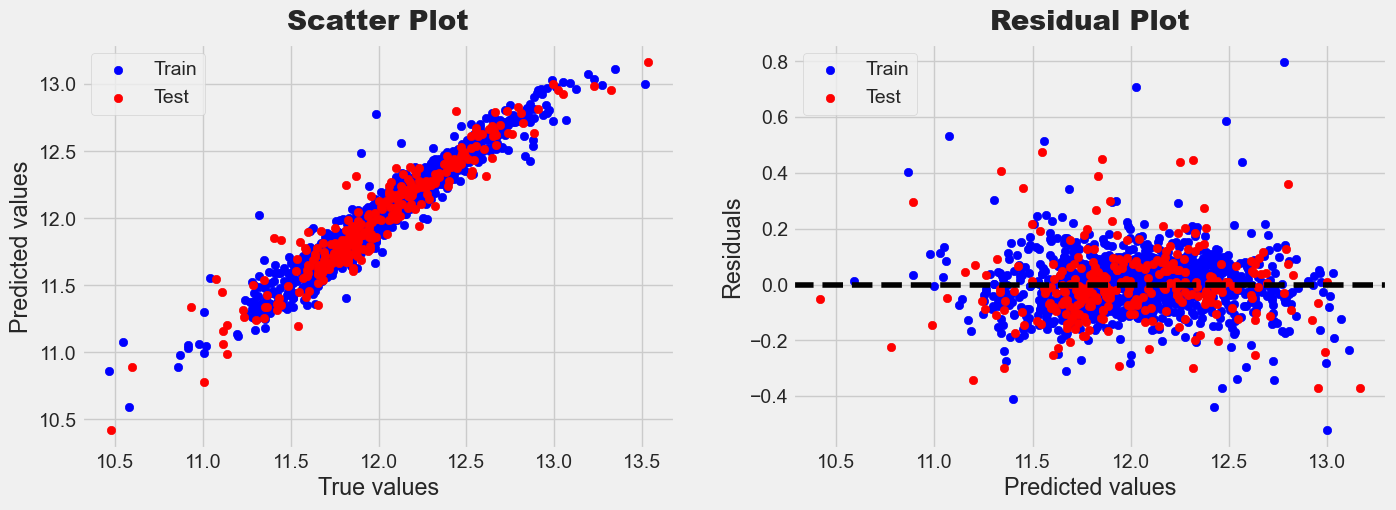

In [137]:
model_evaluation(LinearRegression())

## 2. Creating Support vector Regressor Model.

R2 Score of the SVR() model is=> 0.8840133390833206

MAE of SVR() model is=> 0.09312543150047177
MSE of SVR() model is=> 0.021644385456802293
RMSE of SVR() model is=> 0.14712030946406512


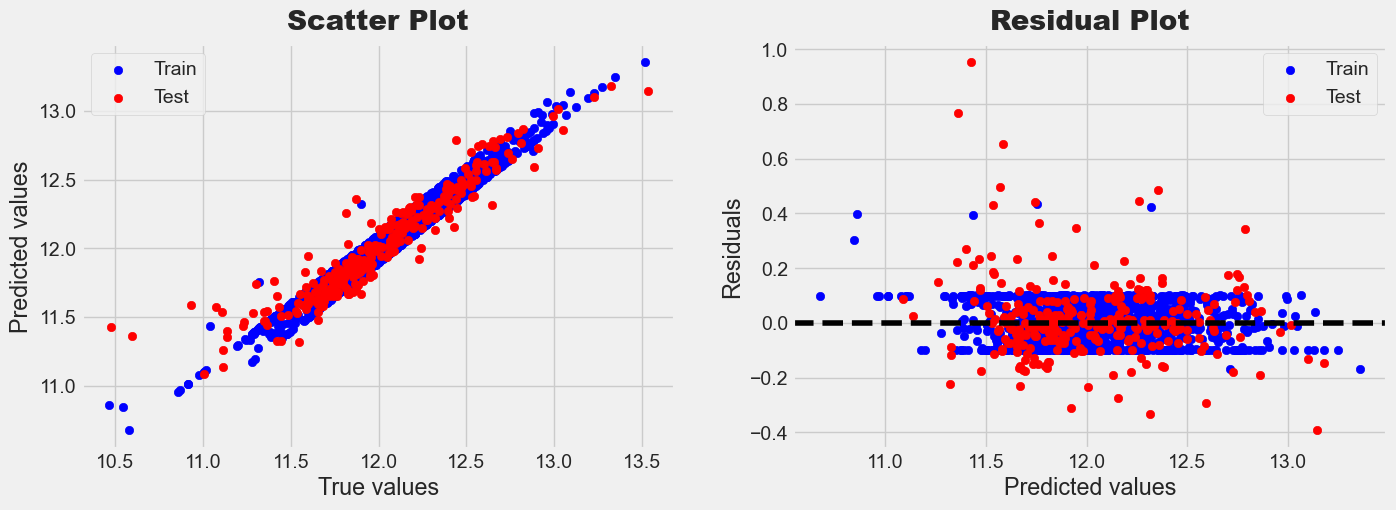

In [139]:
model_evaluation(SVR())

## 3. Creating Random Forest Regressor Model. 

R2 Score of the RandomForestRegressor() model is=> 0.8944982462209556

MAE of RandomForestRegressor() model is=> 0.09466738247576587
MSE of RandomForestRegressor() model is=> 0.019687786570584034
RMSE of RandomForestRegressor() model is=> 0.14031317318977585


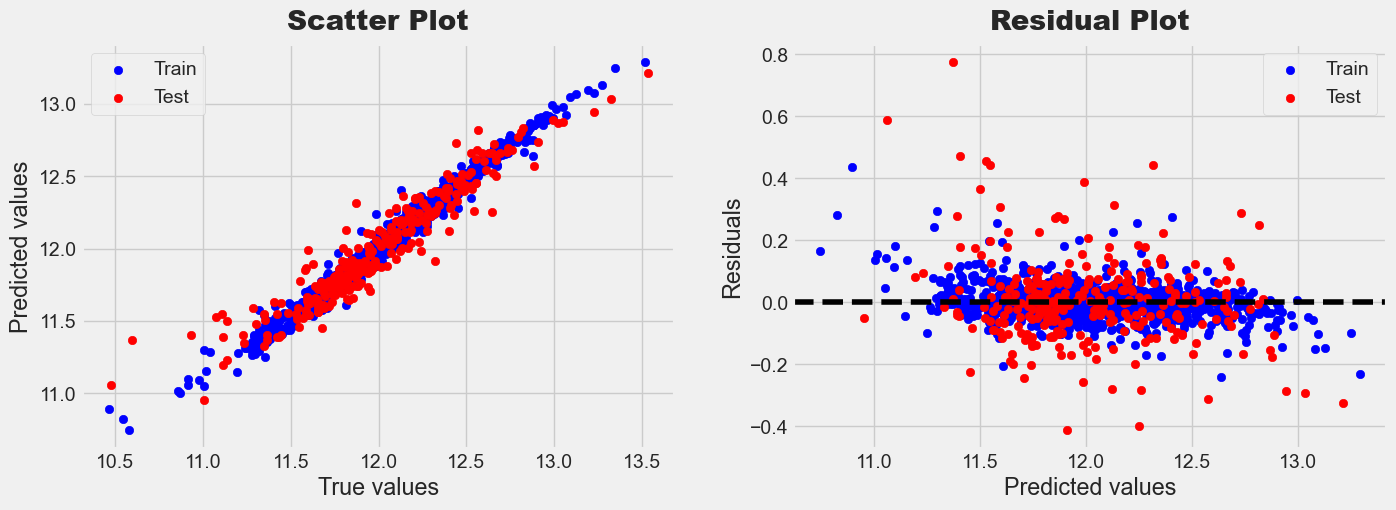

In [140]:
model_evaluation(RandomForestRegressor())

## 4. Creating AdaBoost Regressor Model

R2 Score of the AdaBoostRegressor() model is=> 0.8563110736714278

MAE of AdaBoostRegressor() model is=> 0.1204045534511622
MSE of AdaBoostRegressor() model is=> 0.026813932591471343
RMSE of AdaBoostRegressor() model is=> 0.1637496033322565


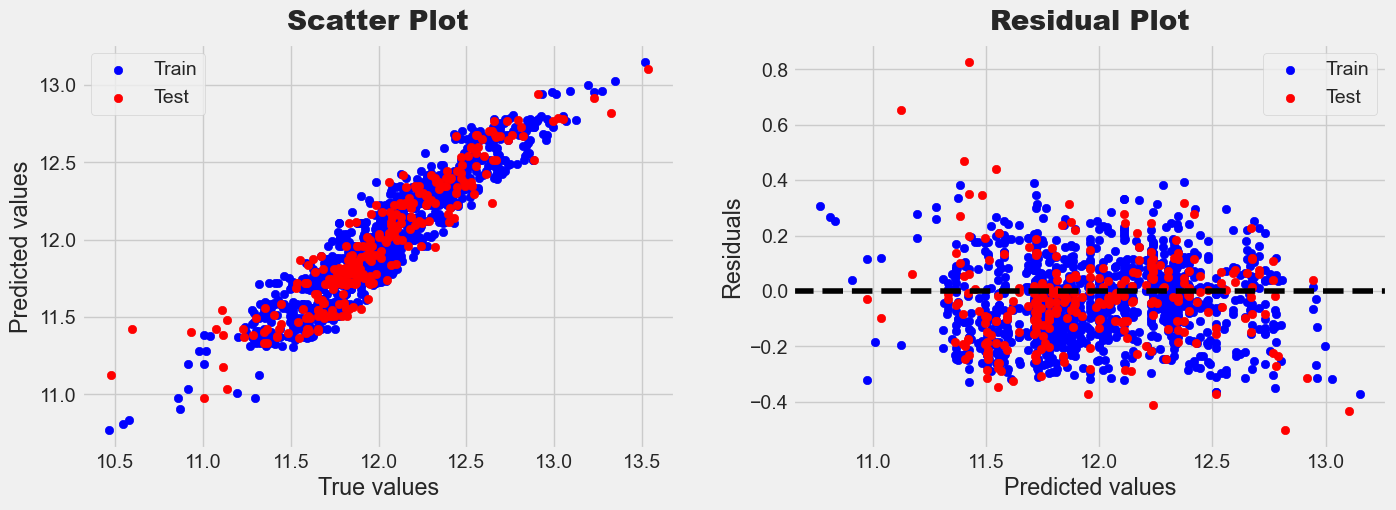

In [141]:
model_evaluation(AdaBoostRegressor())

## 5. Creating Gradient Boosting Regressor Model.

R2 Score of the GradientBoostingRegressor() model is=> 0.9132014604469371

MAE of GradientBoostingRegressor() model is=> 0.08791934838270062
MSE of GradientBoostingRegressor() model is=> 0.016197561274081194
RMSE of GradientBoostingRegressor() model is=> 0.12726964003281063


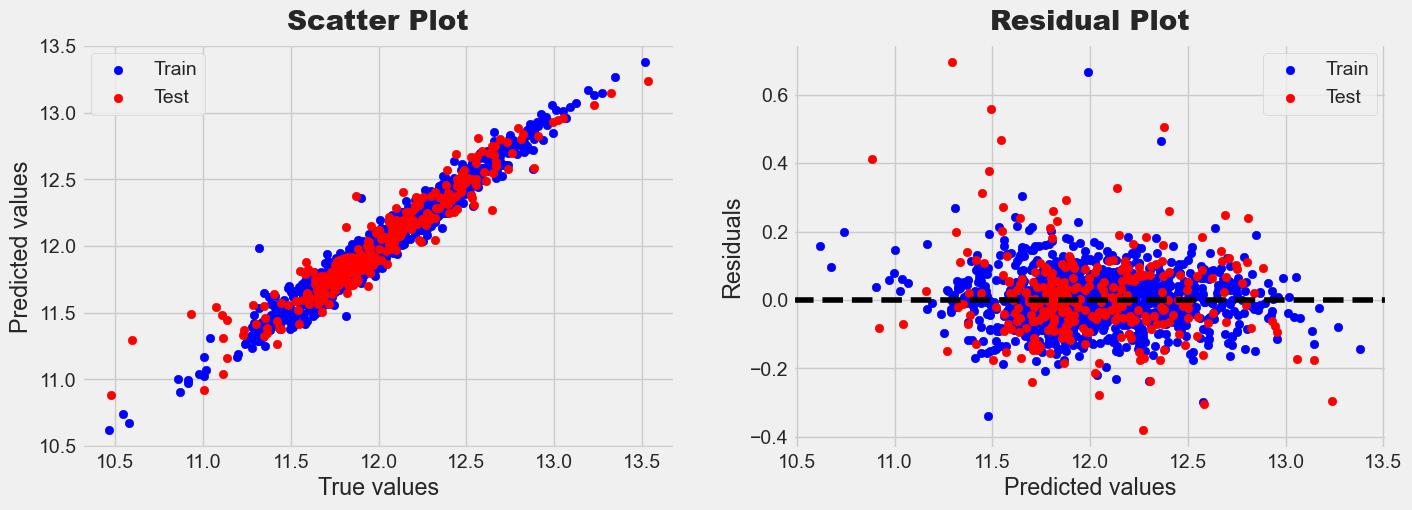

In [142]:
model_evaluation(GradientBoostingRegressor())

## 6. Creating XGBRegressor Model.

R2 Score of the XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...) model is=> 0.8932434813715499

MAE of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,

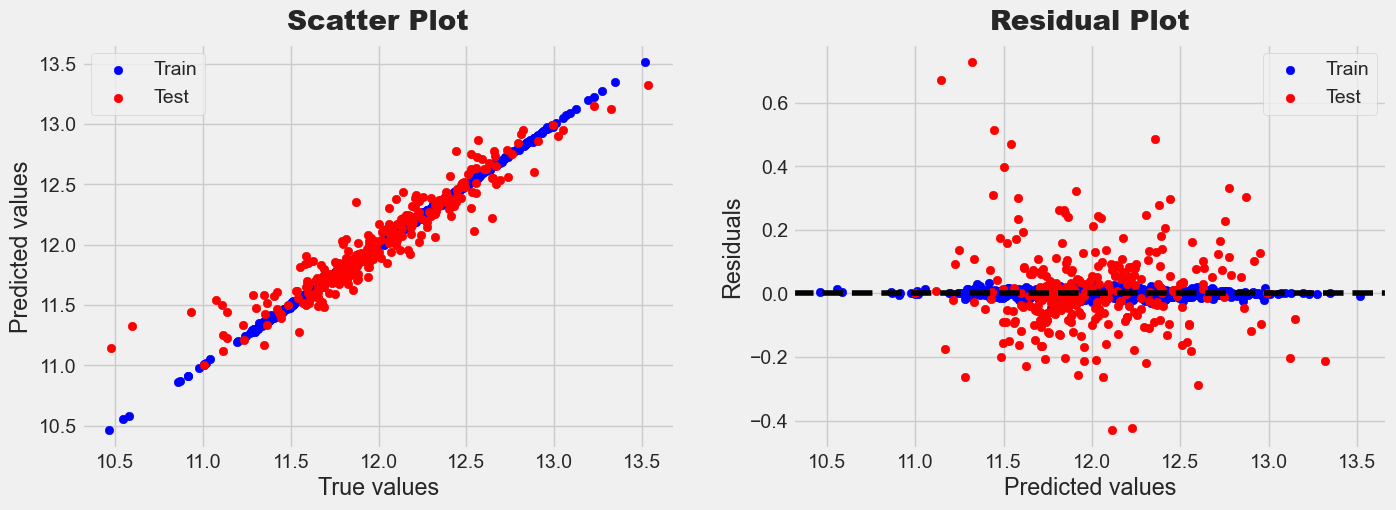

In [144]:
model_evaluation(XGBRegressor())

## Model's Performance Comparison

In [149]:
algos = ["LinearRegression","SVR","RandomForestRegresor","AdaBoostRegressor","GradientBoostRegressor","XGBoostRegressor"]

In [150]:
new_df = pd.DataFrame({"Model":algos,"R2_Score":r2_value,
                       "MAE":mae_value,"MSE":mse_value,"RMSE":rmse_value})

In [151]:
new_df

Model  R2_Score       MAE       MSE      RMSE
0        LinearRegression  0.911685  0.092195  0.016481  0.128377
1                     SVR  0.884013  0.093125  0.021644  0.147120
2    RandomForestRegresor  0.894498  0.094667  0.019688  0.140313
3       AdaBoostRegressor  0.856311  0.120405  0.026814  0.163750
4  GradientBoostRegressor  0.913201  0.087919  0.016198  0.127270
5        XGBoostRegressor  0.893243  0.096427  0.019922  0.141145

### Inference:
#### The best performing model is GradientBoostRegressor with highest R2 and lowest MAE, MSE and RMSE values.
#### The Second and Third best perdorming model is LinearRegressor and XGBoostRegressor.

## Conclusion

#### Key Findings:

##### Features like `1stFlrSF`,`GrLivArea`, 'OverallQual', 'CntRmsUpLev', 'BasementCars' and `BasementSQFootage` are having strong relation with the target variable.
##### The best performing model is GradientBoostRegressor with highest R2 and lowest MAE,MSE,RMSE values.
##### The second & third best performing model is LinearRegressor & XGBoostRegressor models.
##### The project developed a house price prediction model with strong performance metrics.
##### The project effectively addresses the task of house price prediction and contributes as a valuable tool in the dynamic real estate industry.